# FINAL TASK PROJECT BASED INTERNSHIP id/x Partners x Rakamin Academy DS:<br>BUILD A PREDICTION MODEL TO PREDICT THE CLIENT CREDIT WORTHINESS

<p align="center">
  <img src="https://algorit.ma/wp-content/uploads/2021/03/Logo-IDX-Partners.jpg" width="40%" />
  <img src="https://idn-static-assets.s3-ap-southeast-1.amazonaws.com/school/10284.png" width="25%" />
</p>

**Project Overview**<br>
The project is about building a prediction model to predict the client credit worthiness, by given the dataset of loan data from 2007 - 2014. 

**Project Goals**:<br>
Reduce Reduce the financial losses due to loan defaults and increase the company's profitability.

**Project Objective**:<br>
In order to mitigate the risk of financial loses on bad loans, we must develop a model capable of predicting the creditworthiness of borrowers.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
import datetime
import scipy.stats as stats
from scipy.stats import f_oneway 
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Load Data & Premilinary Data Analysis

In [2]:
# Read the CSV file into a DataFrame(dfloan)
dfloan = pd.read_csv('../data/loan_data_2007_2014.csv', low_memory=False)

# Select th ecolumns of dfoan that have object dtype and store them in categoric
categoric = dfloan.select_dtypes('object')

# Seelct the columns of dfloan that have number dtype and store them in numeric
numeric = dfloan.select_dtypes('number')

# Assign the number of rows and columns to rows and cols variables
rows = dfloan.shape[0]
cols = dfloan.shape[1]

# Print the shape of dfloan
print(f'Data Rows: {rows}\nData Columns: {cols}')

# Print sample of 6 rows from dfloan
print('\nData sample showcase:')
display(dfloan.sample(6))

# Print statistical summary of the cateogircal data in dfloan
print('\nCategorical data statistical summary:')
display(categoric.describe())

# Print statistical summary of the numerical data in dfloan
print('\nNumerical data statistical summary:')
display(numeric.describe())

Data Rows: 466285
Data Columns: 75

Data sample showcase:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
316741,316741,25507263,27960190,11000,11000,11000.0,36 months,14.49,378.58,C,C4,Title Clerk,10+ years,MORTGAGE,43000.0,Not Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,132xx,NY,23.89,1.0,Sep-01,1.0,20.0,NaN,12.0,0.0,6155,71.6,22.0,f,6690.94,6690.94,6057.28,6057.28,4309.06,1748.22,0.0,0.0,0.0,Dec-15,378.58,Feb-16,Jan-16,0.0,20.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,89956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,NaN,NaN,NaN
285332,285332,30165625,32708821,20000,20000,20000.0,60 months,16.29,489.45,D,D2,Engineer,< 1 year,RENT,172000.0,Source Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,787xx,TX,13.97,0.0,Jun-02,0.0,NaN,NaN,6.0,0.0,49571,56.7,11.0,w,16401.05,16401.05,7384.91,7384.91,3598.95,3785.96,0.0,0.0,0.0,Jan-16,489.45,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,85938.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55900.0,NaN,NaN,NaN
237550,237550,36410231,39131551,14375,14375,14375.0,36 months,7.49,447.09,A,A4,medical claims adjuster,2 years,RENT,50000.0,Source Verified,Dec-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,917xx,CA,26.07,0.0,Nov-96,0.0,NaN,NaN,13.0,0.0,7539,23.7,32.0,f,9551.21,9551.21,5806.19,5806.19,4823.79,982.40,0.0,0.0,0.0,Jan-16,447.09,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,21690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31800.0,NaN,NaN,NaN
426078,426078,12765849,14787998,30000,30000,30000.0,36 months,14.16,1027.67,C,C2,MEDICAL TECHNOGLIST,10+ years,MORTGAGE,75000.0,Verified,Mar-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,700xx,LA,20.16,3.0,Mar-97,1.0,22.0,NaN,16.0,0.0,22246,37.0,51.0,f,13190.06,13190.06,22608.74,22608.74,16809.94,5798.80,0.0,0.0,0.0,Jan-16,1027.67,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,108808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60036.0,NaN,NaN,NaN
332264,332264,23393116,25756051,7000,7000,7000.0,36 months,10.15,226.37,B,B2,Admin assistant,< 1 year,MORTGAGE,31200.0,Source Verified,Aug-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,740xx,OK,18.54,0.0,Jan-83,2.0,52.0,NaN,9.0,0.0,5329,43.0,27.0,w,3957.58,3957.58,3848.29,3848.29,3042.42,805.87,0.0,0.0,0.0,Jan-16,226.37,Feb-16,Jan-16,0.0,52.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,75687.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12400.0,NaN,NaN,NaN
234633,234633,37127311,39900043,10400,10400,10400.0,60 months,8.19,211.83,A,A5,Senior Server Engineer,4 years,OWN,86000.0,Source Verified,Dec-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,913xx,CA,9.38,1.0,Feb-03,0.0,10.0,NaN,15.0,0.0,10803,22.1,30.0,w,0.00,0.00,10582.31,10582.31,10400.00,182.31,0.0,0.0,0.0,Feb-15,10375.21,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,372531.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na


Categorical data statistical summary:


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285



Numerical data statistical summary:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# print all the value counts for each categorical data on dfloan
print('\nCategorical data value counts:')
for col in categoric.columns:
    print(f'{col} value counts:')
    print(categoric[col].value_counts())
    print('=-='*40)


Categorical data value counts:
term value counts:
term
36 months    337953
60 months    128332
Name: count, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
grade value counts:
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
sub_grade value counts:
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64
=-==-==-==-==-==-==-

In [4]:
# Prtin all the value counts for each numerical data on dfloan
print('\nNumerical data value counts:')
for col in numeric.columns:
    print(f'{col} value counts: ')
    print(numeric[col].value_counts())
    print('=-='*40)


Numerical data value counts:
Unnamed: 0 value counts: 
Unnamed: 0
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: count, Length: 466285, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
id value counts: 
id
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: count, Length: 466285, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
member_id value counts: 
member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=

## Preliminary Data Analysis Summary<br>(Statistics summary & Value Counts)

Based on the statistical summary of our dataset, we identified several issues that need to be addressed:

### 1. High Cardinality Columns

The following columns have too many unique values, leading to high cardinality. These will be dropped:

- `url`: Contains unique URLs for each record.
- `desc`: Contains unique descriptions for each record.
- `title`: Contains unique titles for each record.
- `zip_code`: Contains unique zip codes for each record.
- `emp_title`: Contains unique job titles almost for each record.

### 2. Imbalanced Binary Columns

The following binary column is highly imbalanced and will be dropped:

- `pymnt_plan`: Nearly all records are 'n' (99.9%) with very few 'y' (0.00005%).

### 3. Columns with No Variance

The following columns have only one unique value, offering no variance. These will be dropped:

- `application_type`: All records have the same application type.
- `policy_code`: All records have the same policy code.
- `acc_now_delinq`: This column is highly imbalanced with 99.9% of records being '0'. It's considered to have no variance.

### 4. Columns to be Generalized

The following column will be generalized to reduce its cardinality:

- `addr_state`: This column will be generalized to represent regions instead of individual states.

### Mising Values checking

In [3]:
def plot_missing_values(data):
    """
    This function takes a DataFrame as input and plots a bar chart showing the percentage of missing values in each column.
    
    Parameters:
    df (DataFrame): The DataFrame for which to plot missing values.

    Returns:
    None

    Example:
    >>> plot_missing_values(dfloan)

    """
    # Calculate the percentage of missing values in each column
    missing = (data.isnull().sum() / len(data)) * 100

    # Filter out the columns that have no missing values
    missing = missing[missing > 0]

    # Create a DataFrame from the missing data
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing %': np.round(missing.values, 2) # Round the missing percentage to 2 decimal places
    }) 

    # Sort the DataFrame by the percentage of missing values in descending order
    missing_df = missing_df.sort_values('Missing %', ascending=False)

    # Create a bar plot of the missing data
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x='Missing %', y='Column', data=missing_df)

    # Add the percentage of missing data as text on the bars
    for i, v in enumerate(missing_df['Missing %']):
        ax.text(v + 0.5, i + .4, str(v) + '%', color='red')

    # Set the labels and title of the plot
    ax.set_xlabel('Missing Percentage')
    ax.set_title('Percentage Missing Data for each columns')

    # Display the plot
    plt.show()

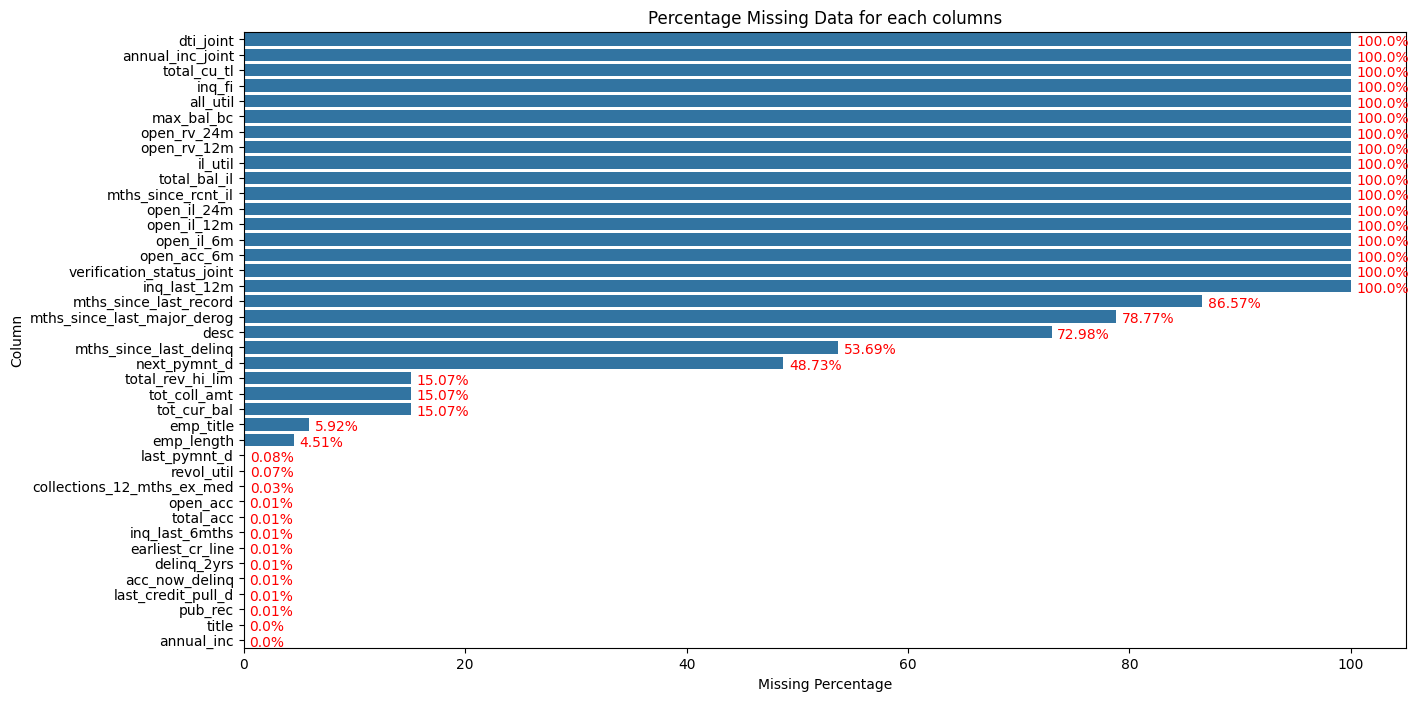

In [4]:
plot_missing_values(dfloan)

- The data contains a lot of missing values, there's 22 columns that contains missing values more than 40% of the data, for this columns i decided to drop them later because it's too much missing values, and i think it's not valid.

- For the rest of the columns i will consider to fill(impute), drop them after i do furhter analysis on the data.

### Duplicate Values Checking

In [ ]:
# print the number of duplicated rows in dfloan
print(dfloan.duplicated().sum())

0


Our data not contains any duplicate values, so we don't need to drop any duplicate values.

### Outlier Checking
This outlier checking it's just a simple checking, because we want to make a scorecard model, outlier can be sensitive to outliers in the data. Outliers can skew the model's parameter estimates, leading to less accurate predictions.

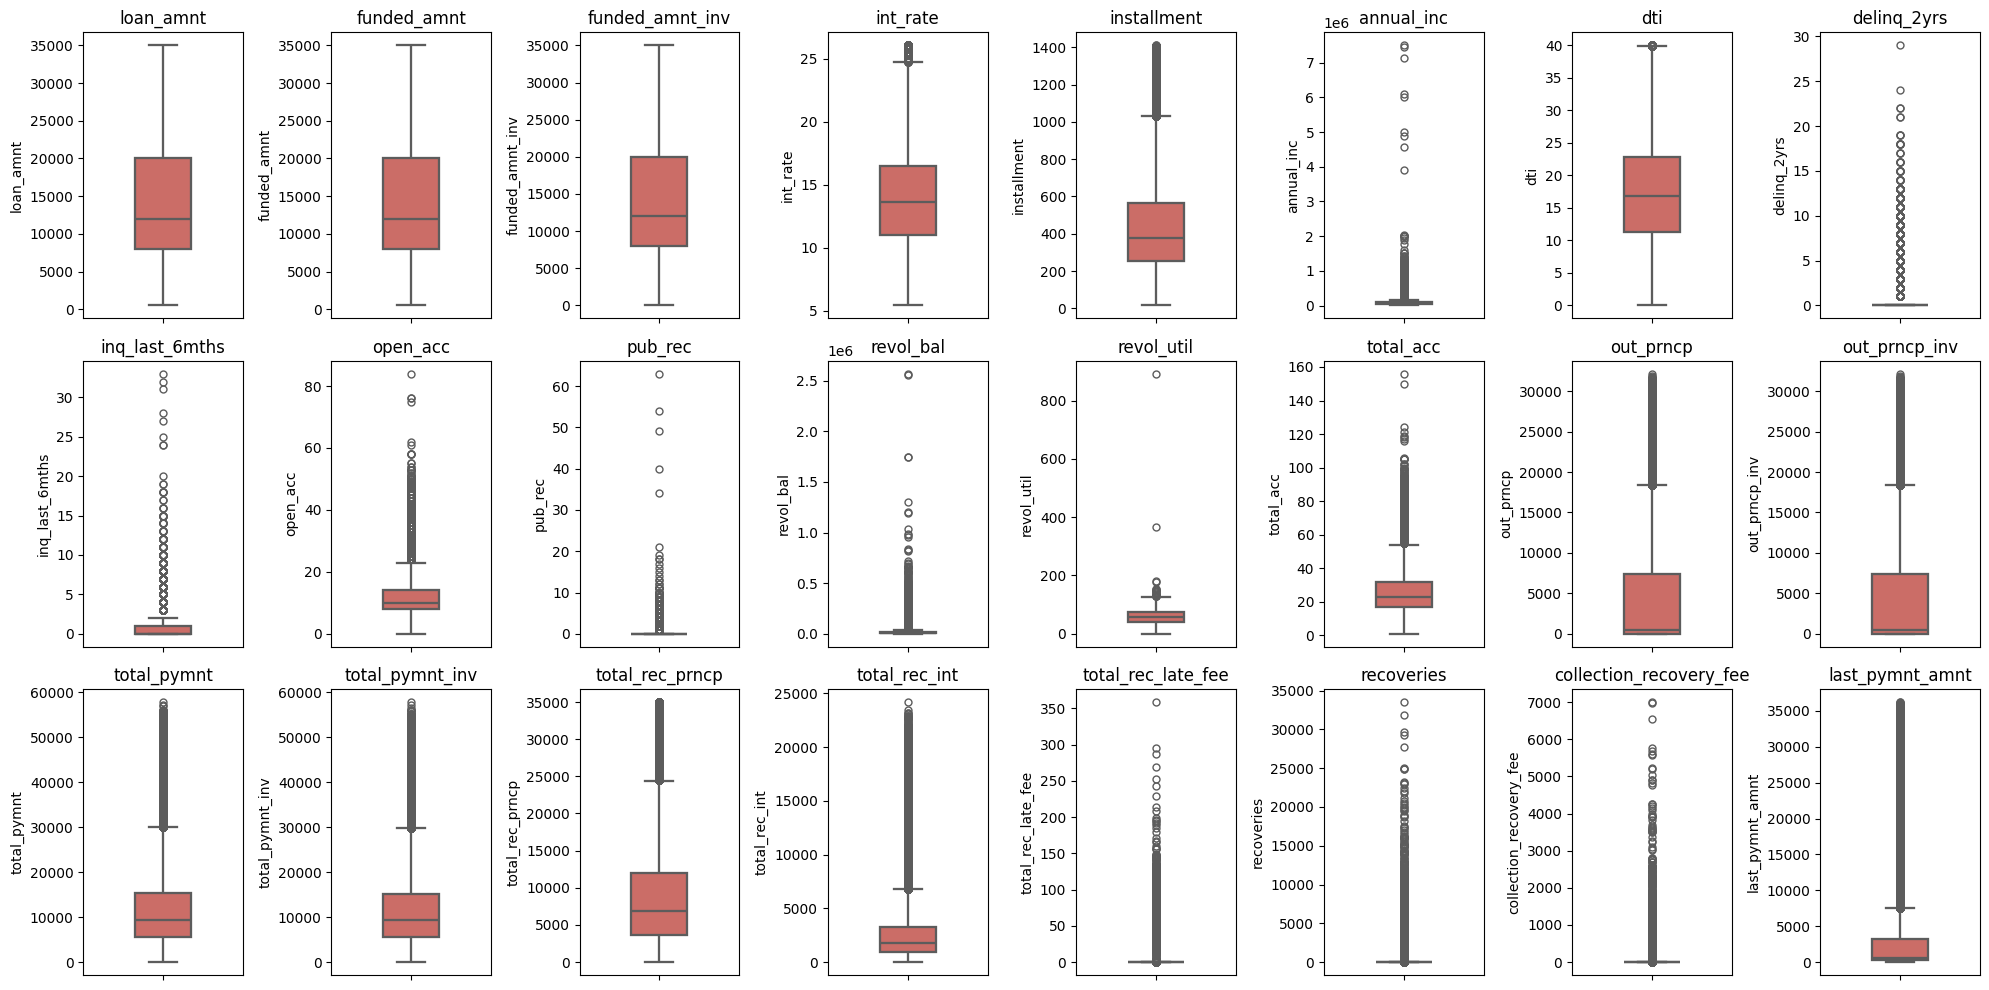

In [ ]:
# Create a copy of the numeric DataFrame to avoid modifying the original data
numeric_copy = numeric.copy()

# Drop unnecessary columns from the copied DataFrame
numeric_dropped = numeric_copy.drop(columns=['id', 'member_id', 'Unnamed: 0', 'policy_code', 'acc_now_delinq', 'collections_12_mths_ex_med'])

# Calculate the percentage of missing values in each column
num_mis = (numeric_dropped.isna().sum() / len(dfloan) * 100)

# Filter out the columns with less than 0.4% missing values
low_missing_num = num_mis[num_mis < 0.4]

# Create a new DataFrame with the filtered columns
numeric_new = numeric_copy.loc[:, low_missing_num.index]

# Create a figure with a specific size for plotting
plt.figure(figsize=(20, 10))

# Loop through each column in the new DataFrame
for i, col in enumerate(numeric_new.columns):
    # Create a subplot for each column
    plt.subplot(3, 8, i+1)
    # Create a boxplot for the current column
    sns.boxplot(numeric[col], palette='hls', width=0.35, linewidth=1.65, fliersize=5)
    # Set the title of the subplot to the column name
    plt.title(col)
    # Adjust the layout of the plot
    plt.tight_layout()

# Display the plot
plt.show()

From the boxplot above, we can detect that there's some column that contains outliers:
- `annual_inc`
- `delinq_2yrs`
- `inq_last_6mths`
- `open_acc`
- `pub_rec`
- `revol_bal`
- `revol_util`
- `total_acc`
- `total_rec_fee`
- `recoveries`
- `collection_recovery_fee`

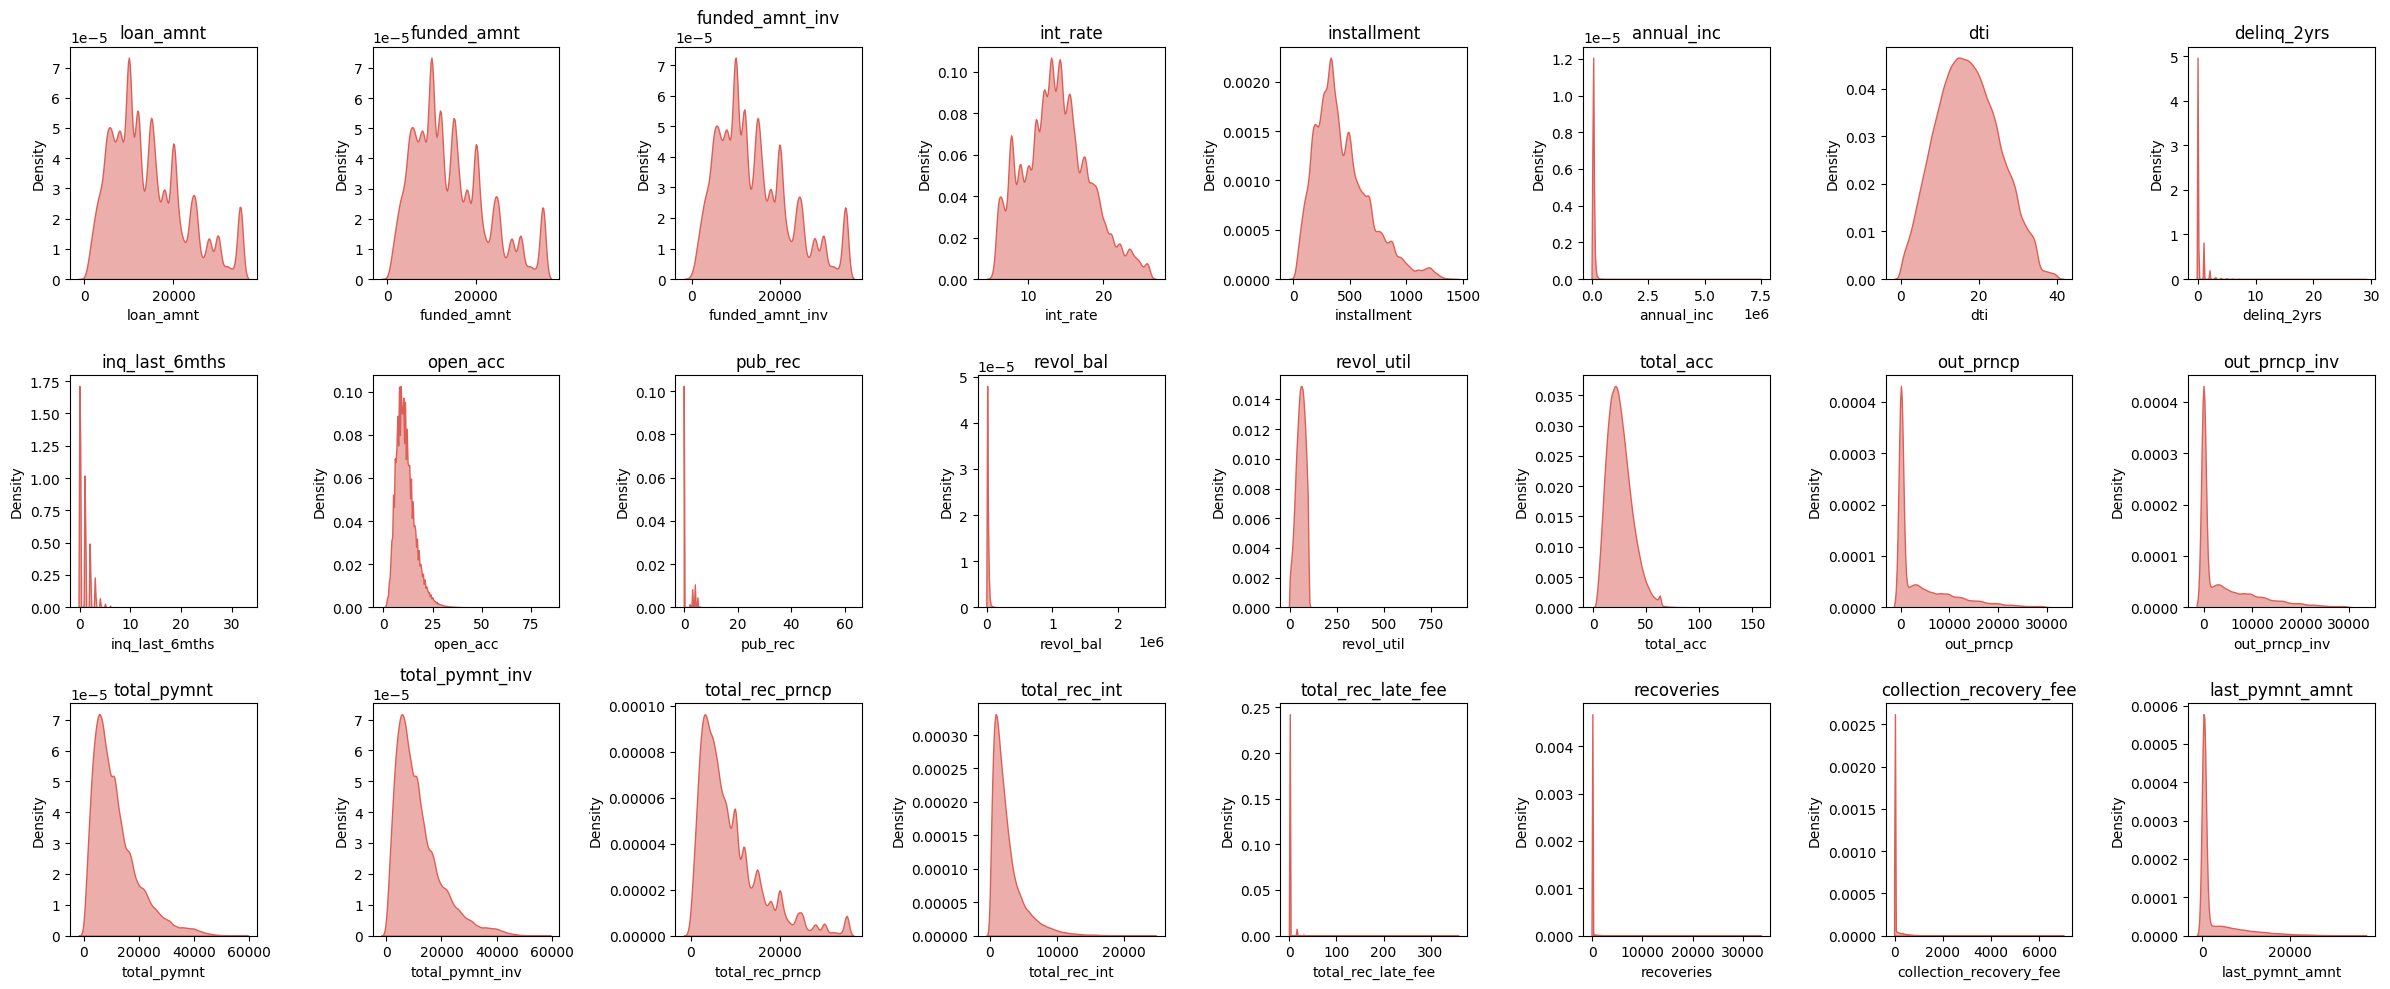

In [ ]:
# create kdeplot 3x9 grid of the numeric DataFrame
plt.figure(figsize=(24, 10))
for i, col in enumerate(numeric_new.columns):
    plt.subplot(3, 8, i+1)
    sns.kdeplot(numeric[col], color='#db5f57', shade=True, alpha=0.5)
    plt.title(col)
    plt.tight_layout()

# Display the plot 
plt.show()

most of our numerical data distributios are positively skewed, the values will be imputed with median, and for columns with >40% missing values, the columns will be dropped.

### Loan Status distribution

In [31]:
dfloan.loan_status.value_counts()

loan_status
Good Loan    410953
Bad Loan      55332
Name: count, dtype: int64

I decided to make Loan status feature as our target variable, because the value is reasonable eg: Fully Paid, Current, Default, Charged Off, etc., so i will bin the value to 2 categories, wich is bad loan and good loan based on the value of the loan status :
- Bad Loan : Default, Charged Off, Late (31-120 days), Late (16-30 days), Does not meet the credit policy. Status:Charged Off, In Grace Period

- Good Loan : Fully Paid, Current, Does not meet the credit policy. Status:Fully Paid

Let's visualize the distribution of the loan status, and aggregate the total loan amount received by the loan status, to see wich loan status that have the most loan amount received.

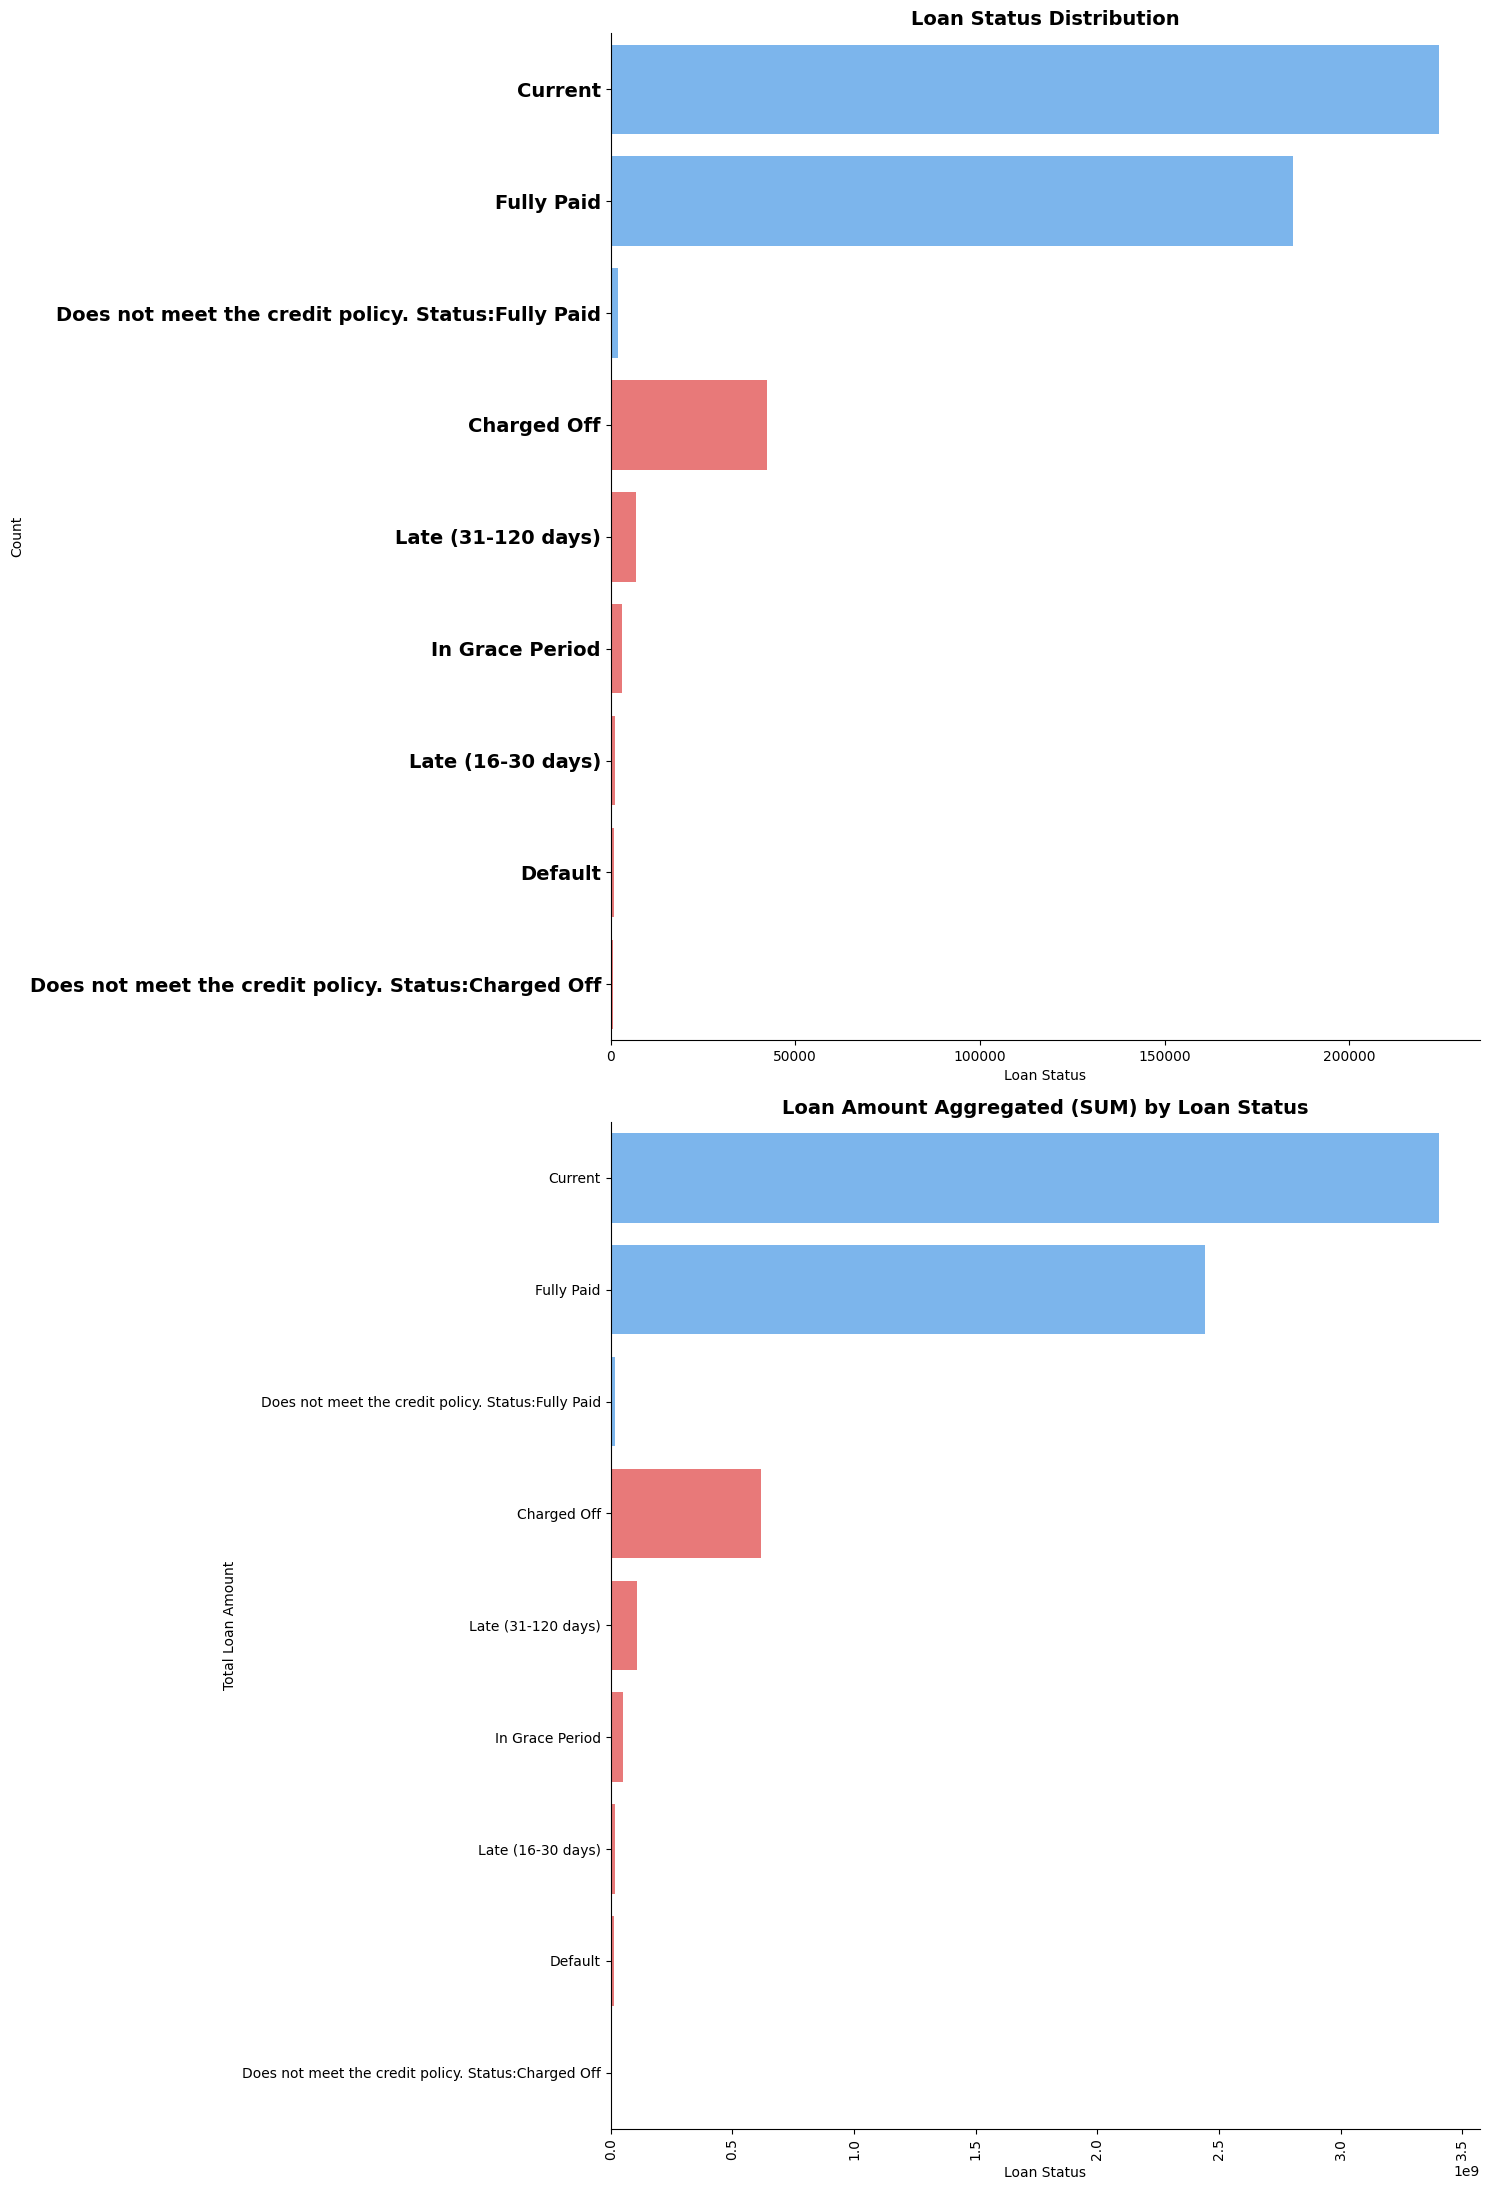

In [5]:
# Create a pie chart of the loan_status column
plt.figure(figsize=(15, 22))

loan_status_values = dfloan['loan_status'].value_counts()
# loan_status_labels = loan_status_values.index
target_colors = ['#69B5FF'] * 3 + ['#FA6767'] * 6
good_bad_sort = [
    'Current',
    'Fully Paid',
    'Does not meet the credit policy. Status:Fully Paid',
    'Charged Off', 
    'Late (31-120 days)',
    'In Grace Period', 
    'Late (16-30 days)',
    'Default',
    'Does not meet the credit policy. Status:Charged Off'
]

plt.subplot(2, 1, 1)
sns.countplot(y='loan_status', data=dfloan, palette=target_colors, order=good_bad_sort)
plt.title('Loan Status Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.yticks(fontsize=14, fontweight='bold')


plt.subplot(2, 1, 2)
sum_loan = dfloan.groupby('loan_status')['loan_amnt'].sum().to_frame().reset_index().rename(columns={'loan_amnt': 'total_loan_amount'})
sns.barplot(y='loan_status', x='total_loan_amount', data=sum_loan, palette=target_colors, order=good_bad_sort)

sns.despine()
plt.title('Loan Amount Aggregated (SUM) by Loan Status', fontsize=14, fontweight='bold')
plt.ylabel('Total Loan Amount')
plt.xlabel('Loan Status')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Insight🔎:**
- Current and Fully paid loan status is the most common in our data, from this we can already see that the loan status is imbalanced,
- From the sum aggregated loan amount by loan status, we can see that the most loan amount received is from Current and Fully Paid loan status again. 

In [6]:
# Dropping unnecessary columns from the dataframe
dfloan = dfloan.drop(columns=['id', 'member_id', 'Unnamed: 0'], axis=1)

# Define a function to map loan status to 'Good Loan' or 'Bad Loan'
def map_loan_status(status):
    """
    Function to map loan status to 'Bad Loan' or 'Good Loan'.
    
    Parameters:
    status (str): The loan status to be mapped.
    
    Returns:
    str: 'Bad Loan' if the status is in the list of default statuses, 'Good Loan' otherwise.
    """
    
    # List of loan statuses that imply a default
    default_statuses = [
        'Charged Off', 
        'Late (31-120 days)', 
        'Late (16-30 days)',
        'In Grace Period',
        'Default',
        'Does not meet the credit policy. Status:Charged Off'
    ]
    
    # Return 'Bad Loan' if the status is in the list of default statuses, 'Good Loan' otherwise
    return 'Bad Loan' if status in default_statuses else 'Good Loan'

# Apply the map_loan_status function to each status in the 'loan_status' column
dfloan['loan_status'] = dfloan['loan_status'].apply(map_loan_status)

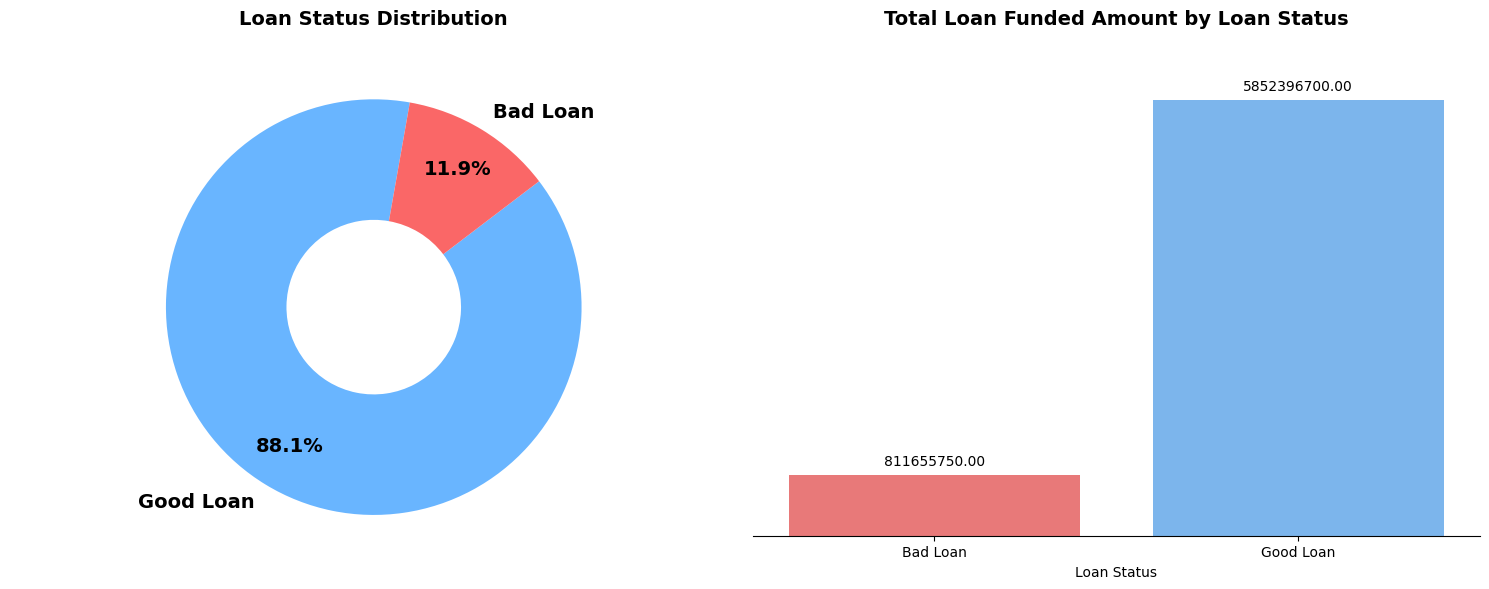

In [7]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Get the value counts of the 'loan_status' column
loan_status_values = dfloan['loan_status'].value_counts()

# Get the index of the value counts (unique values of 'loan_status')
loan_status_labels = loan_status_values.index

# Create a subplot
plt.subplot(1, 2, 1)

# Define the colors for the pie chart
target_colors = ['#69B5FF','#FA6767']

# Create a pie chart
wedges, texts, autotexts = plt.pie(
    loan_status_values,
    labels=loan_status_labels,
    autopct='%1.1f%%', # to display the percent value using Python string formatting.
    startangle=80, # to rotate the start of the pie chart by given degrees counterclockwise from the x-axis.
    colors=target_colors,
    wedgeprops=dict(width=0.58), # to pass in key-value pairs to apply to each wedge in the pie chart.
    textprops={'fontsize': 14, 'fontweight': 'bold'}, # to pass in key-value pairs to apply to the text within the pie chart.
    pctdistance=0.78
 )

# Set the title of the pie chart
plt.title('Loan Status Distribution', y=1.1, fontsize=14, fontweight='bold')

# Remove the y-axis label
plt.ylabel('')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Loop through the texts and autotexts to add the counts to the labels
# for i, text in enumerate(texts):
#     text.set_text(f'{text.get_text()} ({loan_status_values.iloc[i]})')


# Create a subplot
plt.subplot(1, 2, 2)

# Group the data by 'loan_status' and sum the 'funded_amnt' for each group
# Convert the result to a DataFrame, reset the index, and rename the 'funded_amnt' column
sum_funded = dfloan.groupby('loan_status')['funded_amnt'].sum().to_frame().reset_index().rename(columns={'funded_amnt': 'total_funded_amount'})

# Create a bar plot of the total funded amount for each loan status
# The colors for the bars are taken from the 'target_colors' list
barplot = sns.barplot(x='loan_status', y='total_funded_amount', data=sum_funded, palette=[target_colors[1], target_colors[0]])

# Loop through the bars in the bar plot
for p in barplot.patches:
    # Annotate each bar with its height (the total funded amount)
    # The annotation is placed above the bar, centered horizontally
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

# Remove the left spine of the plot
sns.despine(left=True)

# Set the title of the plot
plt.title('Total Loan Funded Amount by Loan Status', fontsize=14, fontweight='bold', y=1.1)

# Remove the y-axis label
plt.ylabel('')

# Set the x-axis label
plt.xlabel('Loan Status')

# Remove the y-axis ticks
plt.yticks([])

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
dfloan.loan_status.value_counts()

loan_status
Good Loan    410953
Bad Loan      55332
Name: count, dtype: int64

**Insight🔎:**
- As said before the target is imbalanced, after we bin the loan status to Good loan and Bad Loan, we can see that the Good Loan proportion is 88.8% and the Bad Loan proportion is 11.2%,

- From the Aggregated (Sum) loan amount by Good Loan and Bad Loan, Total Loan payment amount received from the good loan **5,912,713,975 USD** and from the bad loan we lost **763,217,800 USD**.

- There's **5,912,713,975 USD** funded loan defaulted by the borrower, this is a huge amount of money, so we need to build a model that can predict the borrower's credit worthiness, so we can minimize the risk of losing money from the bad loan.

### Define Function to plot 

#### Function to plot stacked bar chart

In [9]:
def create_stacked_barchart(data, value_col, status_col, order=None, target_colors=None, bbox_to_anchor=None):
    """
    Creates a stacked bar chart showing the proportion of good and bad loans for each category in a specified column.

    Parameters:
    data (DataFrame): The data to plot.
    value_col (str): The name of the column in 'data' that contains the categories for the x-axis.
    status_col (str): The name of the column in 'data' that contains the loan status.
    order (list, optional): The order in which to display the categories on the x-axis. If None, the categories are displayed in the order they appear in 'data'.
    target_colors (list, optional): A list of two colors to use for the 'Good Loan' and 'Bad Loan' bars. If None, the default colors are used.
    bbox_to_anchor (tuple, optional): The anchor point for the legend. If None, the legend is placed in the upper right corner.

    Returns:
    None
    """
    # Calculate the proportion of each loan status within each group
    lstatus_props = data.groupby(value_col)[status_col].value_counts().unstack()

    # Reindex lstatus_props according to the provided order
    lstatus_props = lstatus_props.reindex(order)

    # Normalize the counts to get the proportion and convert to percentages
    lstatus_props = (lstatus_props.div(lstatus_props.sum(axis=1), axis=0) * 100)

    # Create the 'Good Loan' bars
    bars1 = plt.bar(lstatus_props.index, lstatus_props['Good Loan'], color=target_colors[0], label='Good Loan')

    # Create the 'Bad Loan' bars
    bars2 = plt.bar(lstatus_props.index, lstatus_props['Bad Loan'], bottom=lstatus_props['Good Loan'], color=target_colors[1], label='Bad Loan')

    # Calculate total height of each bar
    total = [i+j for i,j in zip(lstatus_props['Good Loan'], lstatus_props['Bad Loan'])]

    # Add percentage annotations only for 'Bad Loan'
    for bar1, bar2, total in zip(bars1, bars2, total):
        percentage2 = bar2.get_height() / total * 100
        plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height() - 5, f'{percentage2:.1f}%', ha='center', va='bottom', color='black')

    # Set the title and labels
    plt.title(f"Client's Default Rate Compared by Their {value_col.replace('_', ' ').title()}", y=1.09, fontsize=18, fontweight='bold')
    plt.xlabel(f'{value_col.replace("_", " ").title()}', fontsize=12.5, loc='right')
    plt.ylabel('Percentage of Clients', fontsize=12.5)

    # Get current axes and make the top spine invisible
    plt.gca().spines['top'].set_visible(False)

    # Get current axes and make the right spine invisible
    plt.gca().spines['right'].set_visible(False)

    # Add a legend
    plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=bbox_to_anchor)

#### Function to create lineplot

In [10]:
def create_lineplot(x, y, data, hue=None, target_colors=None, bbox_to_anchor=None):
    """
    Creates a line plot for the given data.

    Parameters:
    x (str): The name of the column in 'data' to be used for the x-axis.
    y (str): The name of the column in 'data' to be used for the y-axis.
    data (DataFrame): The data to plot.
    hue (str, optional): The name of the column in 'data' to be used for color encoding. If None, no hue encoding is applied.
    target_colors (list, optional): A list of colors to use for the different levels of the 'hue' variable. If None, the default colors are used.
    bbox_to_anchor (tuple, optional): The anchor point for the legend. If None, the legend is placed in the upper right corner.

    Returns:
    None
    """
    # Create a line plot of loan amounts and annual income by employment length
    sns.lineplot(x=x, y=y, data=data, palette=target_colors, ci=None, hue=hue)

    # Set the title and labels
    plt.title(f'{hue.replace("_", " ").title()} {y.replace("_", " ").title()} by {x.replace("_", " ").title()}', fontsize=18, fontweight='bold', y=1.09)
    plt.xlabel(f'{x}', fontsize=12.5, labelpad=10, loc='right')
    plt.ylabel(f'{y.replace("_", " ").title()}', fontsize=12.5)

    # Add a legend
    plt.legend(title=hue.replace("_", " ").title(), loc='upper right', bbox_to_anchor=bbox_to_anchor)

    # Remove the top and right spines from plot
    sns.despine()

#### Function to create countplot and barplot

In [11]:
def create_countplot(x, data, hue=None, order=None, palette=None):
    """
    Function to create a count plot using seaborn.

    Parameters:
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    data (DataFrame): The DataFrame containing the data to be plotted.
    hue (str): The variable in data to map plot aspects to different colors.
    order (list): The order to plot the categorical levels in.
    palette (str or dict): Method for choosing the colors to use when mapping the hue semantic.

    Returns:
    None
    """
    # Create a count plot with the specified parameters
    sns.countplot(x=x, data=data, hue=hue, order=order, palette=palette)
    
    # Remove the top and right spines from plot
    sns.despine()

    # Set the title of the plot
    plt.title(f'Count of Loans by {x.replace("_", " ").title()}', fontsize=18, fontweight='bold', y=1.09)
    
    # Set the label of the x-axis
    plt.xlabel(f'{x.replace("_", " ").title()}', fontsize=12.5, loc='right')
    
    # Set the label of the y-axis
    plt.ylabel('Count', fontsize=12.5)


def create_barplot(x, y, data, hue=None, order=None, palette=None):
    """
    Function to create a bar plot using seaborn.

    Parameters:
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    data (DataFrame): The DataFrame containing the data to be plotted.
    order (list): The order to plot the categorical levels in.
    palette (str or dict): Method for choosing the colors to use when mapping the hue semantic.

    Returns:
    None
    """
    # Create a bar plot with the specified parameters
    sns.barplot(x=x, y=y, data=data, hue=hue, order=order, palette=palette)
    
    # Remove the top and right spines from plot
    sns.despine()

    # Set the title of the plot
    plt.title(f'{y.replace("_", " ").title()} by {x.replace("_", " ").title()}', fontsize=18, fontweight='bold', y=1.09)
    
    # Set the label of the x-axis
    plt.xlabel(f'{x.replace("_", " ").title()}', fontsize=12.5, loc='right')
    
    # Set the label of the y-axis
    plt.ylabel(f'{y.replace("_", " ").title()}', fontsize=12.5)

### Loan year issued Analysis

In [12]:
# Convert the 'issue_d' column to datetime format with 'Oct-14' style dates
dfloan['issue_d'] = pd.to_datetime(dfloan['issue_d'], format='%b-%y')

# Extract the year from the datetime object ad store it in a new column 'years'
dfloan['years'] = dfloan['issue_d'].dt.year

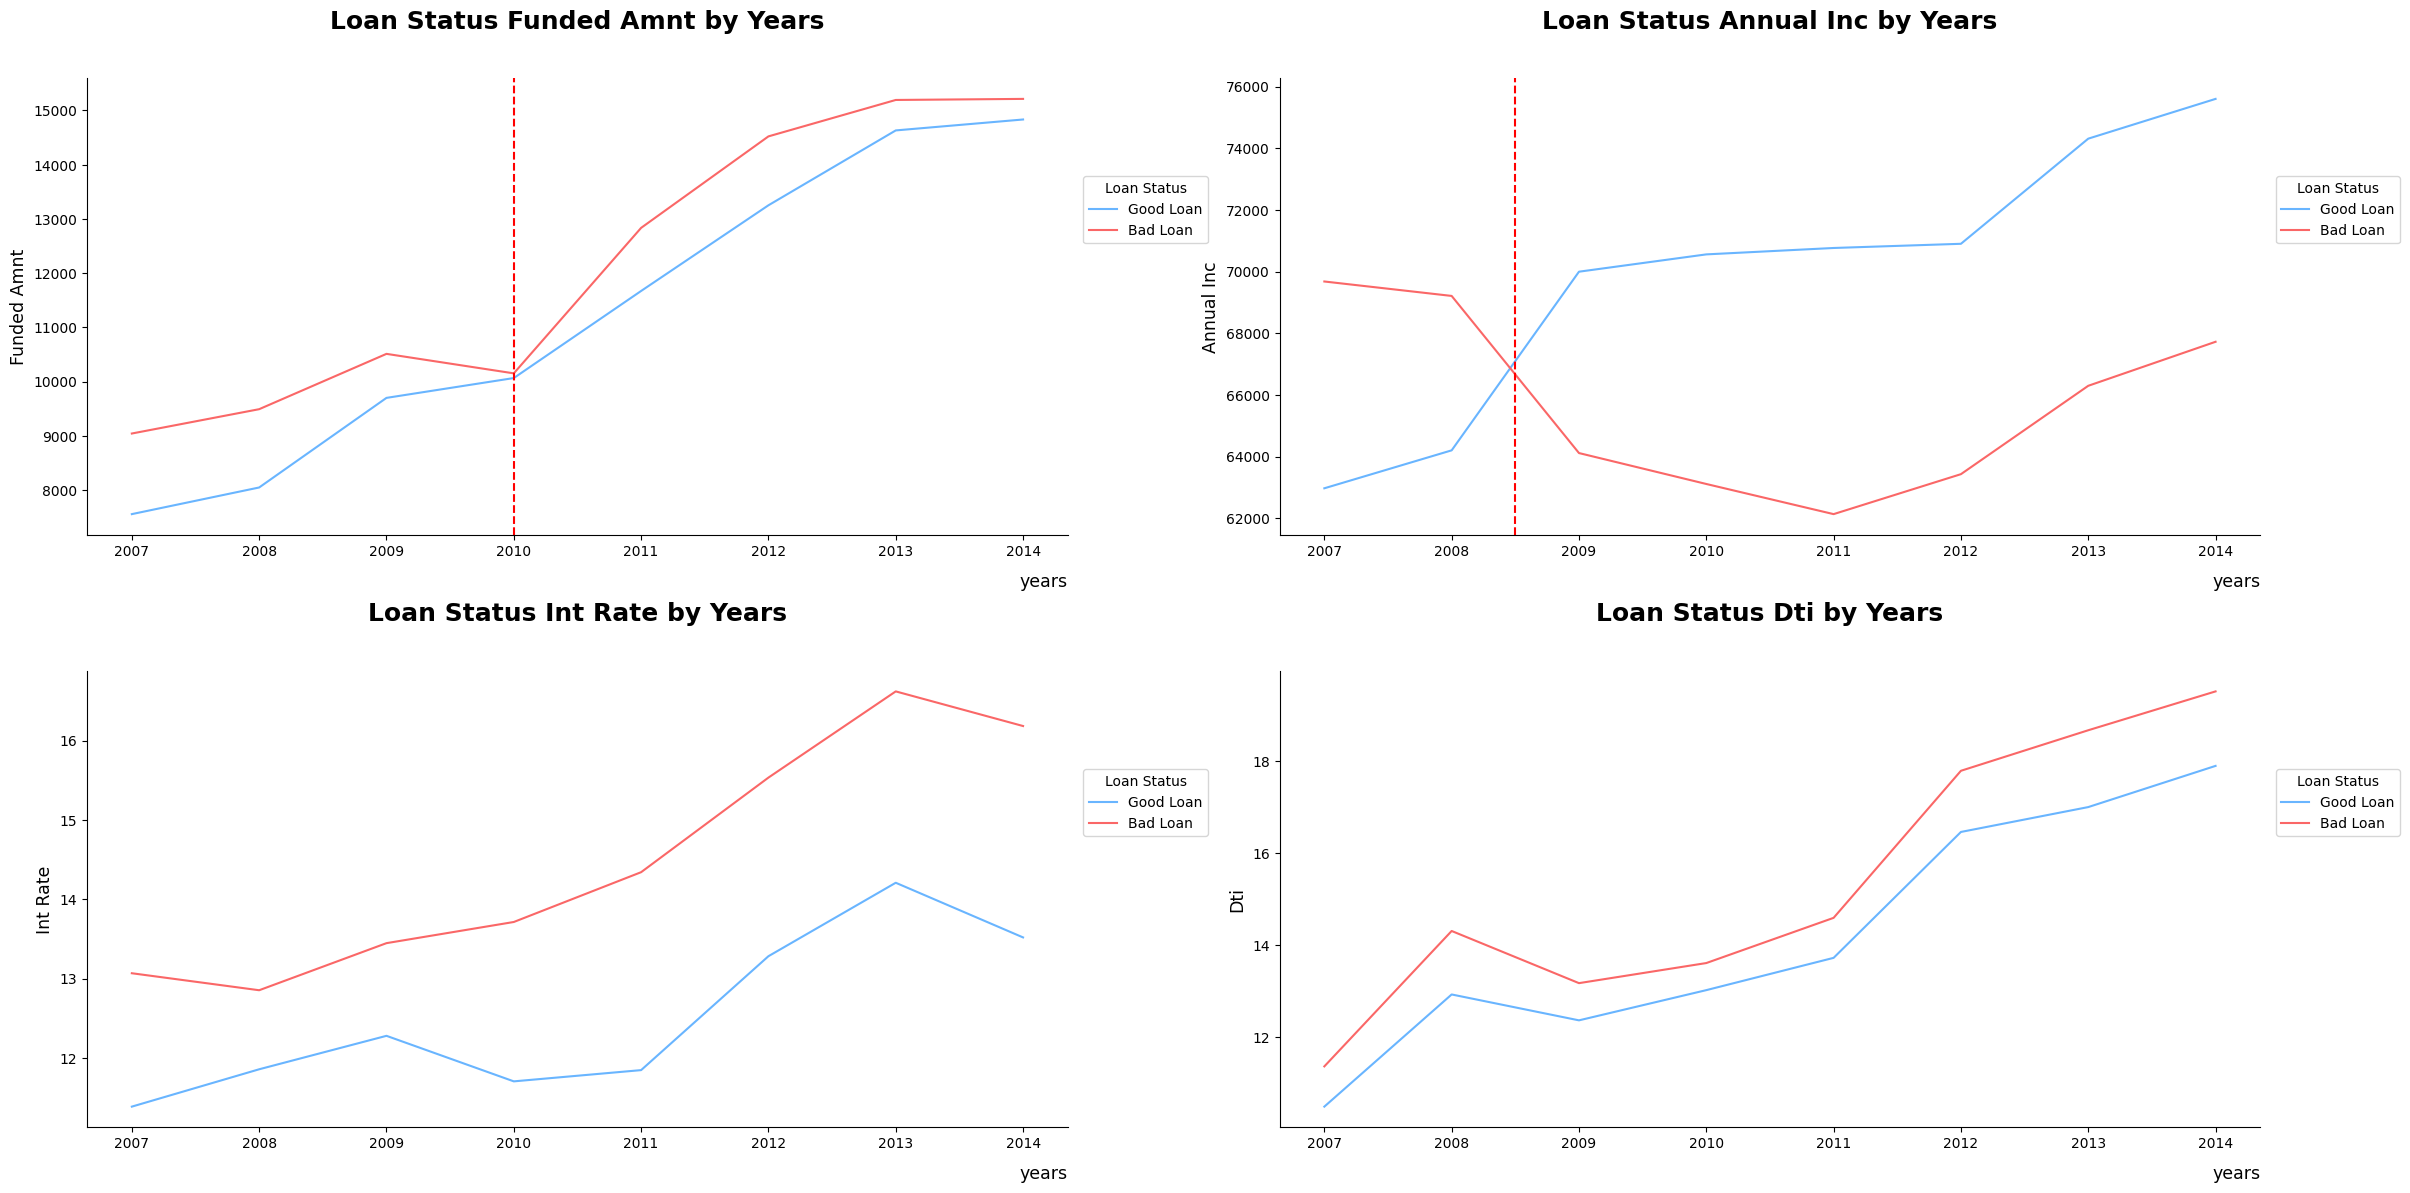

In [13]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 2, 1)
create_lineplot('years', 'funded_amnt', dfloan, hue='loan_status', target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))
plt.axvline(x=2010, color='red', linestyle='--', linewidth=1.5)

plt.subplot(2, 2, 2)
create_lineplot('years', 'annual_inc', dfloan, hue='loan_status', target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))
plt.axvline(x=2008.5, color='red', linestyle='--', linewidth=1.5)

plt.subplot(2, 2, 3)
create_lineplot('years', 'int_rate', dfloan, hue='loan_status', target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))

plt.subplot(2, 2, 4)
create_lineplot('years', 'dti', dfloan, hue='loan_status', target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))

plt.tight_layout()
plt.show()

**Insight🔎** :<br> 

- *Client Loan status' loan amount by Years*
    - The number of loans issued has been increasing over the years
    - Clients with bad loan have more loan amount than clients with good loan, but there's static trend for the bad loan from 2017 to 2010, above 2010 the trend is increasing again til 2014

- *Client Loan status' annual income by Years*
    - Client with good loan have lower income than client with bad loan from 2007 to half 2009, from the half 2009 client with good loan income increase significantly, and the client with bad loan income is gets lower over the years

- *Client Loan status' interest rate by Years*
    - The interest rate for client with bad loan is higher than client with good loan over the years, the trend pattern is almost the same for both client with good and bad loan

- *Client Loan status' loan amount by Years*
    - Debt to Income Ratio for client with bad loan is higher than client with good loan over the years, the trend pattern is almost the same for both client with good and bad loan



### US Region Analysis

In [14]:
dfloan.addr_state.value_counts().index

Index(['CA', 'NY', 'TX', 'FL', 'IL', 'NJ', 'PA', 'OH', 'GA', 'VA', 'NC', 'MI',
       'MA', 'MD', 'AZ', 'WA', 'CO', 'MN', 'MO', 'CT', 'IN', 'NV', 'TN', 'OR',
       'WI', 'AL', 'SC', 'LA', 'KY', 'KS', 'OK', 'AR', 'UT', 'NM', 'HI', 'WV',
       'NH', 'RI', 'DC', 'MT', 'DE', 'AK', 'MS', 'WY', 'SD', 'VT', 'IA', 'NE',
       'ID', 'ME'],
      dtype='object', name='addr_state')

Seems all the address state in this data is in US, example:
- CA -> California 
- NY -> New York
- TX -> Texas
- FL -> Florida
- IL -> Illinois
- etc.<br>

from this i can find insight on the top 10 state that have the most loan application later, but for now i wanted to analyze from the US Region first before dive onto the US address state, to do that we have to bin the address state based on the US States Regions Map from [National Geographic](https://education.nationalgeographic.org/resource/united-states-regions/) 

In [15]:
# Define a list of state abbreviations that belong to the West region
West = [
    'CA',  # California
    'NV',  # Nevada
    'UT',  # Utah
    'CO',  # Colorado
    'WY',  # Wyoming
    'MT',  # Montana
    'ID',  # Idaho
    'OR',  # Oregon
    'WA',  # Washington
    'AK',  # Alaska
    'HI'   # Hawaii
]

# Define a list of state abbreviations that belong to the Southwest region
Southwest = [
    'AZ',  # Arizona
    'NM',  # New Mexico
    'TX',  # Texas
    'OK'   # Oklahoma
]

# Define a list of state abbreviations that belong to the Midwest region
Midwest = [
    'ND',  # North Dakota
    'MN',  # Minnesota
    'SD',  # South Dakota
    'NE',  # Nebraska
    'KS',  # Kansas
    'MO',  # Missouri
    'IA',  # Iowa
    'WI',  # Wisconsin
    'IL',  # Illinois
    'IN',  # Indiana
    'OH',  # Ohio
    'MI'   # Michigan
]

# Define a list of state abbreviations that belong to the Southeast region
Southeast = [
    'AR',  # Arkansas
    'LA',  # Louisiana
    'MS',  # Mississippi
    'AL',  # Alabama
    'GA',  # Georgia
    'TN',  # Tennessee
    'KY',  # Kentucky
    'NC',  # North Carolina
    'SC',  # South Carolina
    'WV',  # West Virginia
    'DC',  # District of Columbia
    'VA',  # Virginia
    'DE',  # Delaware
    'FL'   # Florida
]

# Define a list of state abbreviations that belong to the Northeast region
Northeast = [
    'PA',  # Pennsylvania
    'MD',  # Maryland
    'NJ',  # New Jersey
    'NY',  # New York
    'CT',  # Connecticut
    'RI',  # Rhode Island
    'MA',  # Massachusetts
    'NH',  # New Hampshire
    'VT',  # Vermont
    'ME'   # Maine
]

def us_region(state):
    """
    Function to map US state to its corresponding region.

    Parameters:
    state (str): The US state abbreviation.

    Returns:
    str: The region where the state is located.
    """
    # Check if the state is in the West region
    if state in West:
        return 'West'
    # Check if the state is in the Southwest region
    elif state in Southwest:
        return 'Southwest'
    # Check if the state is in the Midwest region
    elif state in Midwest:
        return 'Midwest'
    # Check if the state is in the Southeast region
    elif state in Southeast:
        return 'Southeast'
    # Check if the state is in the Northeast region
    elif state in Northeast:
        return 'Northeast'
    # If the state is not in any of the defined regions, return 'Other'
    else:
        return 'Other'

# Apply the function us_region to 'addr_state' column
# This will create a new column 'region' in the dataframe dfloan
dfloan['region'] = dfloan['addr_state'].apply(us_region)

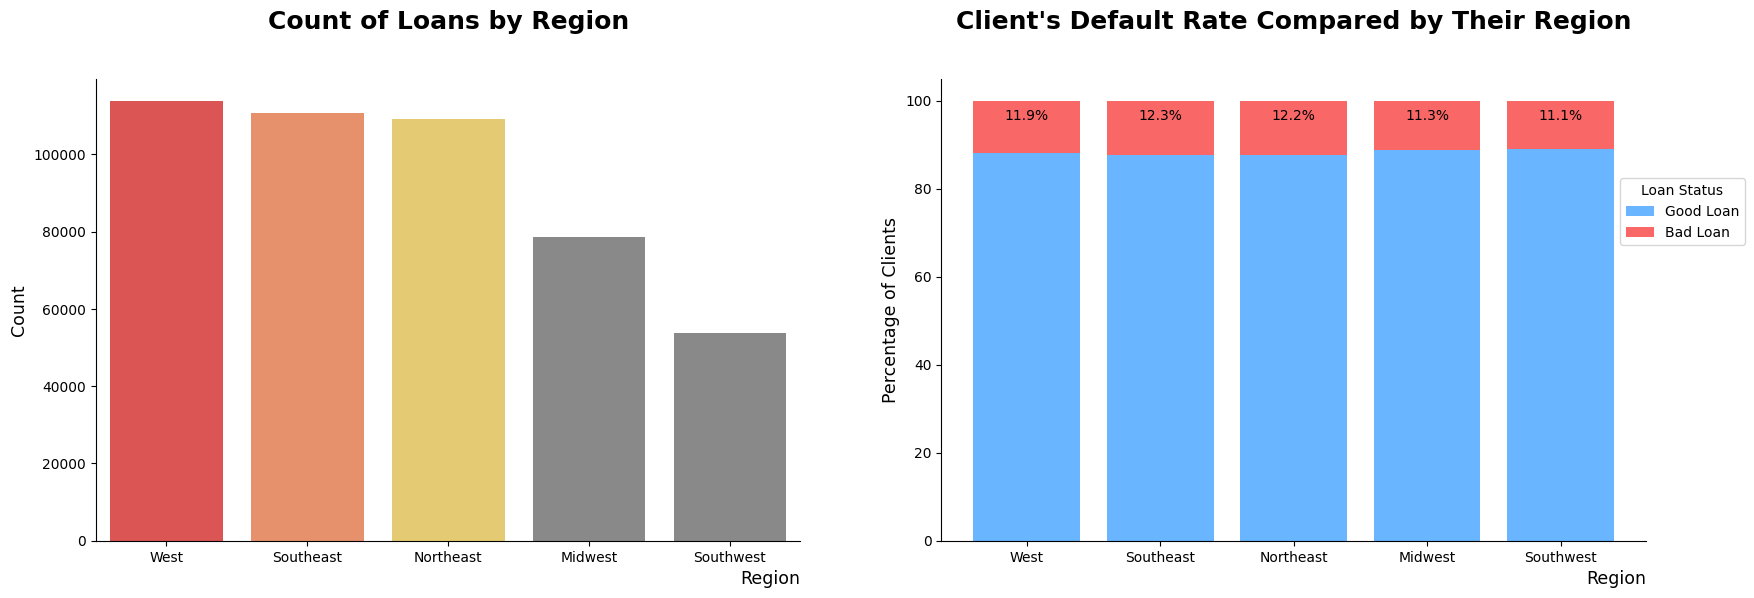

In [16]:
region_order = dfloan.region.value_counts().index
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
pregion = ['#F13F3F', '#FA8958', '#F7D560'] + ['#898989'] * 2
create_countplot('region', dfloan, order=region_order, palette=pregion)


plt.subplot(1, 2, 2)
create_stacked_barchart(dfloan, 'region', 'loan_status', order=region_order, target_colors=['#69B5FF', '#FA6767'], bbox_to_anchor=(1.15, 0.8))

**Insight🔎** :<br> 
- From the US Region Analysis, we can see that the top 3 most loan application is from the West, Southeast, and Northeast Region without no significant difference between them, and the least loan application is from the Southwest Region.

- The default rate between the regions is not significant, but the Southeast Region has the highest default rate compared to the other regions.

- Because of this we need to deep dive into the US Address State to find more insight on the loan application and default rate, and give business recommendation based on the insight.



### US address State analysis

In [17]:
# Count the number of clients in each state
state_counts = dfloan['addr_state'].value_counts()

# Create a data frame with state abbreviations and counts
df_state_counts = pd.DataFrame({'state': state_counts.index, 'count': state_counts.values})

# Create a choropleth map using plotly
fig = go.Figure(data=go.Choropleth(
    locations=df_state_counts['state'], # State abbreviations
    z = df_state_counts['count'].astype(float), # Number of clients in each state
    locationmode = 'USA-states', # Set of locations match entries in `locations`
    colorscale = 'YlGnBu', # Color scale for the choropleth map
    colorbar_title = "Clients count", # Title for the color bar
))

# Update the layout of the figure
fig.update_layout(
    title={
        'text': "Count of loans by state", # Title of the figure
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=20,
            color="black"
        )
    },
    geo_scope='usa', # Limit map scope to USA
    width=1112, # Width of the figure
    height=600 # Height of the figure
)

# Display the figure
fig.show()

# Calculate the number of defaults for each state
defaults = dfloan[dfloan['loan_status'] == 'Bad Loan']['addr_state'].value_counts()

# Calculate the default rate for each state
default_rate = (defaults / state_counts).fillna(0)

# Create a data frame with state abbreviations and default rates
df_state_default_rate = pd.DataFrame({'state': default_rate.index, 'default_rate': default_rate.values})

# Create a choropleth map using plotly
fig = go.Figure(data=go.Choropleth(
    locations=df_state_default_rate['state'], # State abbreviations
    z = df_state_default_rate['default_rate'].astype(float), # Default rate in each state
    locationmode = 'USA-states', # Set of locations match entries in `locations`
    colorscale = 'YlOrRd', # Color scale for the choropleth map
    colorbar_title = "Default rate", # Title for the color bar
))

# Update the layout of the figure
fig.update_layout(
    title={
        'text': "Default rate of loans by state", # Title of the figure
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            size=20,
            color="black"
        )
    },
    geo_scope='usa', # Limit map scope to USA
    width=1112, # Width of the figure
    height=600 # Height of the figure
)

# Display the figure
fig.show()

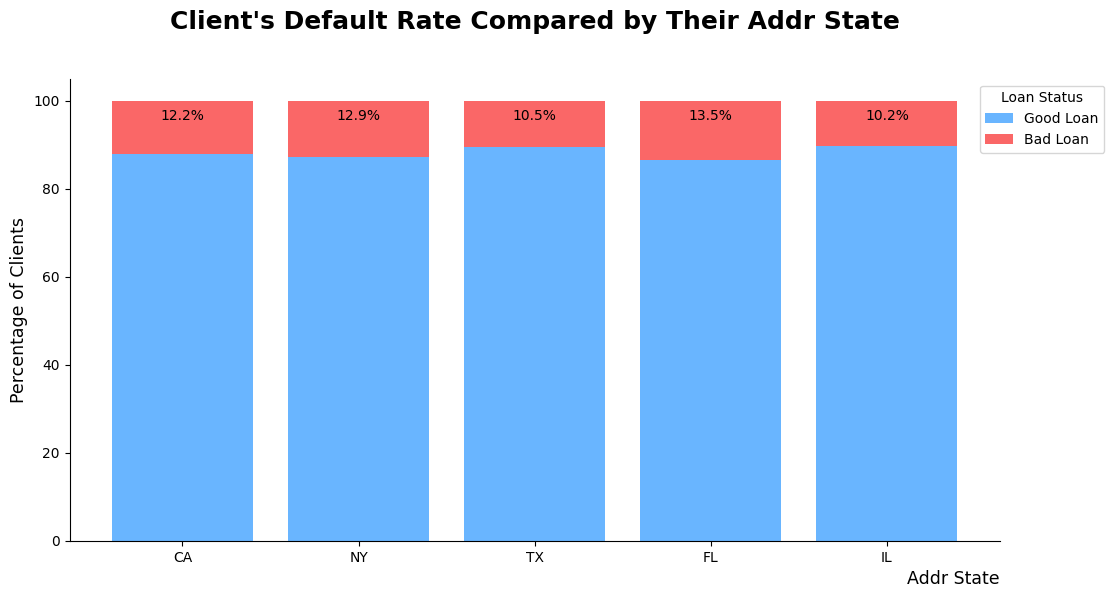

In [18]:
# Create a stacked barchart of loan statuses for the top 5 states to see the default rate
# Get the top 5 states by loan count
top_states = dfloan.addr_state.value_counts().head(5).index

# Filter the dataframe to only include the top 5 states
dfloan_top_states = dfloan[dfloan.addr_state.isin(top_states)]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a stacked bar plot using the function `create_stacked_barchart`
create_stacked_barchart(dfloan_top_states, 'addr_state', 'loan_status', top_states, target_colors, (1.12, 1))

**Insight🔎** :<br> 
- Our top 1 clients are from California(CA), around 70000 of our clients are from California with 11.6% default rate, 
- The second top clients are from New York(NY), with 12.1% default rate,
- But in Texas(TX) the default rate is smaller than the first two, with 9.8% default rate,
- Lastly the highest default rate from this top 5 state is Florida (FL) with 12.8% default rate.
<br><br>

**Recommendation🌟** :<br>
Focusing our loan efforts on clients in Texas (TX) while maintaining a close eye on default rates in other states.<br>

By prioritizing loan applications from Texas, we can potentially increase our approval rate and reduce the risk of defaults.
<br>
However, it's important to  monitor default rates across all states,  including California and New York,  because these states still represent a significant portion of our clients.
<br>

Here are some additional factors to consider:

- Loan delinquency rates: Track not only defaults but also delinquencies (late payments) in different states. This can give us early warning signs of potential defaults.
- Industry trends: Research loan performance across different industries in Texas. There might be specific sectors with a higher risk of defaults.
- Client profile: Analyze the creditworthiness of borrowers beyond just their location. This includes factors like credit score, income stability, and debt-to-income ratio.


### Client's Grade Loan Status Analysis

In [19]:
dfloan.grade.value_counts().index

Index(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype='object', name='grade')

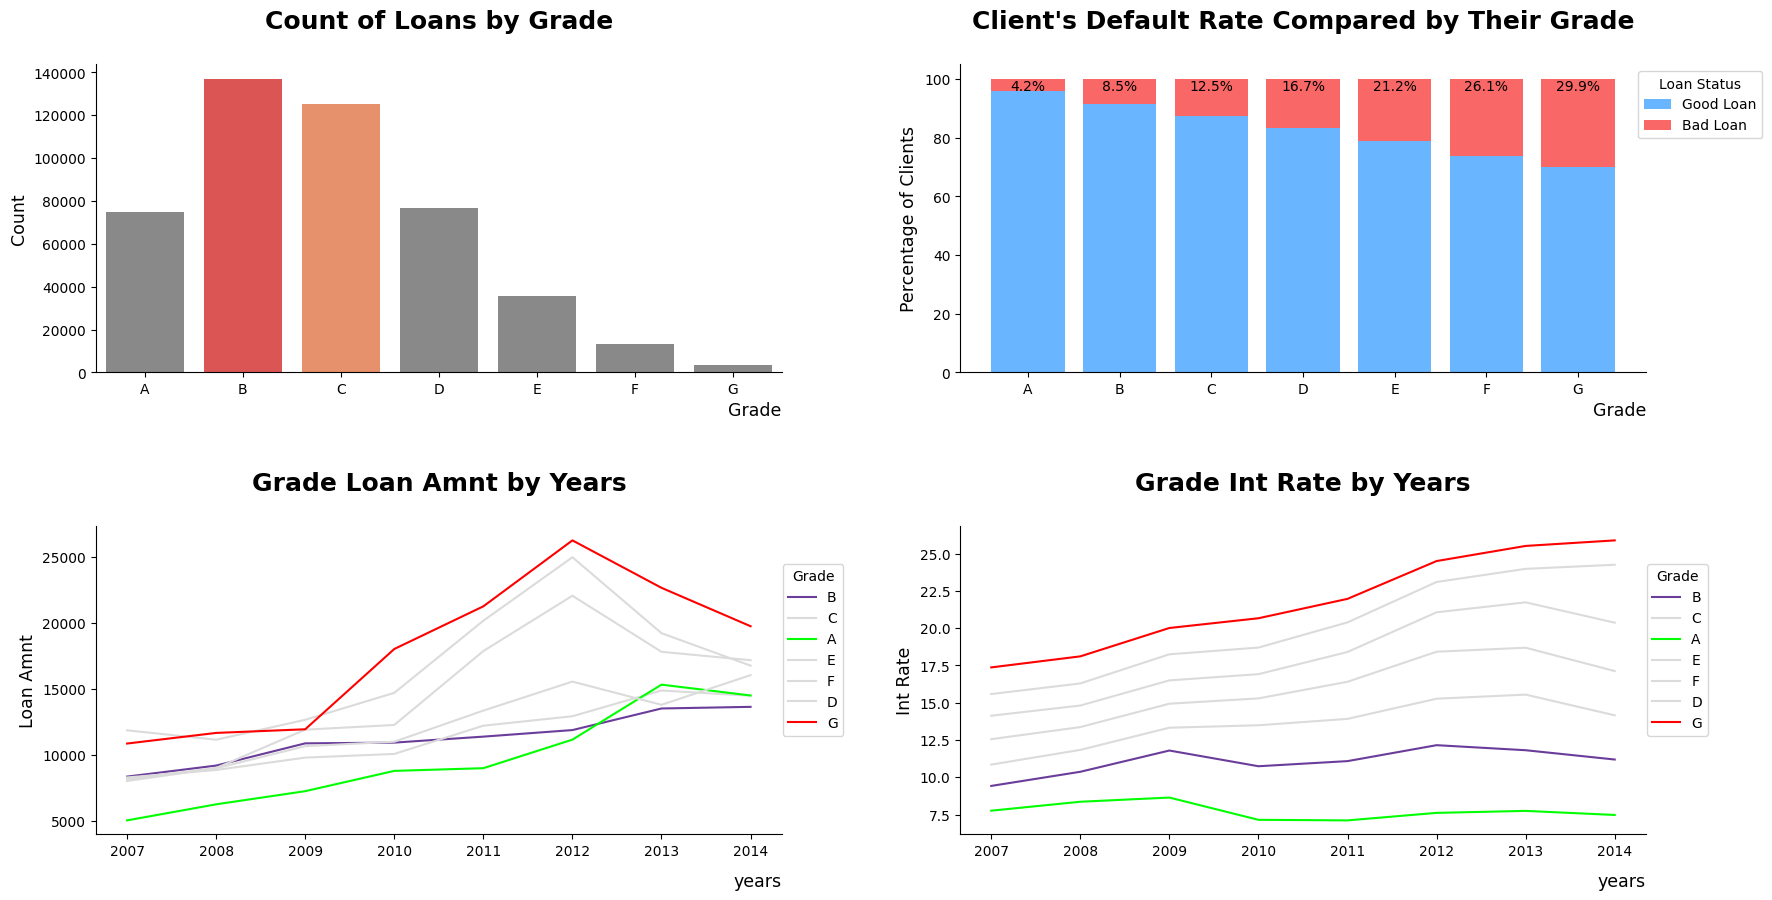

In [20]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create the first subplot
plt.subplot(2, 2, 1)

# Define the order of the grades and the colors for the bars
order_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grade_colors = ['#898989'] + ['#F13F3F', '#FA8958'] + ['#898989'] * 5

# Create a countplot with defied function
create_countplot('grade', dfloan, order=order_grade, palette=grade_colors)

# Create the second subplot
plt.subplot(2, 2, 2)
# Call the function to create a stacked bar chart
create_stacked_barchart(dfloan, 'grade', 'loan_status', order_grade, target_colors, bbox_to_anchor=(1.18, 1))

# Create the third subplot
plt.subplot(2, 2, 3)
grade_color = {
    'A': '#00FF00',
    'B': '#6a3d9a',
    'C': '#DBDBDB',
    'D': '#DBDBDB',
    'E': '#DBDBDB',
    'F': '#DBDBDB',
    'G': '#FF0000'
}

create_lineplot('years', 'loan_amnt', dfloan, 'grade', target_colors=grade_color, bbox_to_anchor=(1.1, 0.9))

# Create the fourth subplot
plt.subplot(2, 2, 4)
create_lineplot('years', 'int_rate', dfloan, 'grade', target_colors=grade_color, bbox_to_anchor=(1.1, 0.9))

plt.subplots_adjust(hspace=0.5, wspace=0.26)
# Adjust the layout of the plots
# plt.tight_layout()

# Display the plots
plt.show()

**Insight🔎** :<br>
- Our clients Loan grade are mostly in B and C grade.

- From the stacked barchart we can see that, the lower the grade the clients have, the higher the default rate.

- The lowest default rate is in Client with A grade loan, with 3.9% default rate.

- The highest default rate is in Client with G grade loan, with 28.4% default rate, and also this grade have the highest loan amount & interest rate.

- By the time from 2007 to 2014, Grade G had the highest funded loan amount than the other grades, while A&B Grade had the lowest DR and Loan Funded Amnt.
<br>

**Recommendation🌟** :<br>
- Focus loan efforts on clients with higher loan grades (A, B, C). Since these grades have demonstrably lower default rates, targeting them can help mitigate risk.

- Implement stricter criteria for lower loan grades (D, E, F, G). This could involve stricter requirements for approval, such as higher credit score requirements or smaller loan amounts. We may also consider charging a higher interest rate for these loans to reflect the increased risk.

- Evaluate the possibility of loan restructuring for existing lower-grade loans. This could involve extending the loan term or lowering the interest rate to make it more manageable for the borrower and reduce the risk of default.


### Client's Employment Length Analysis

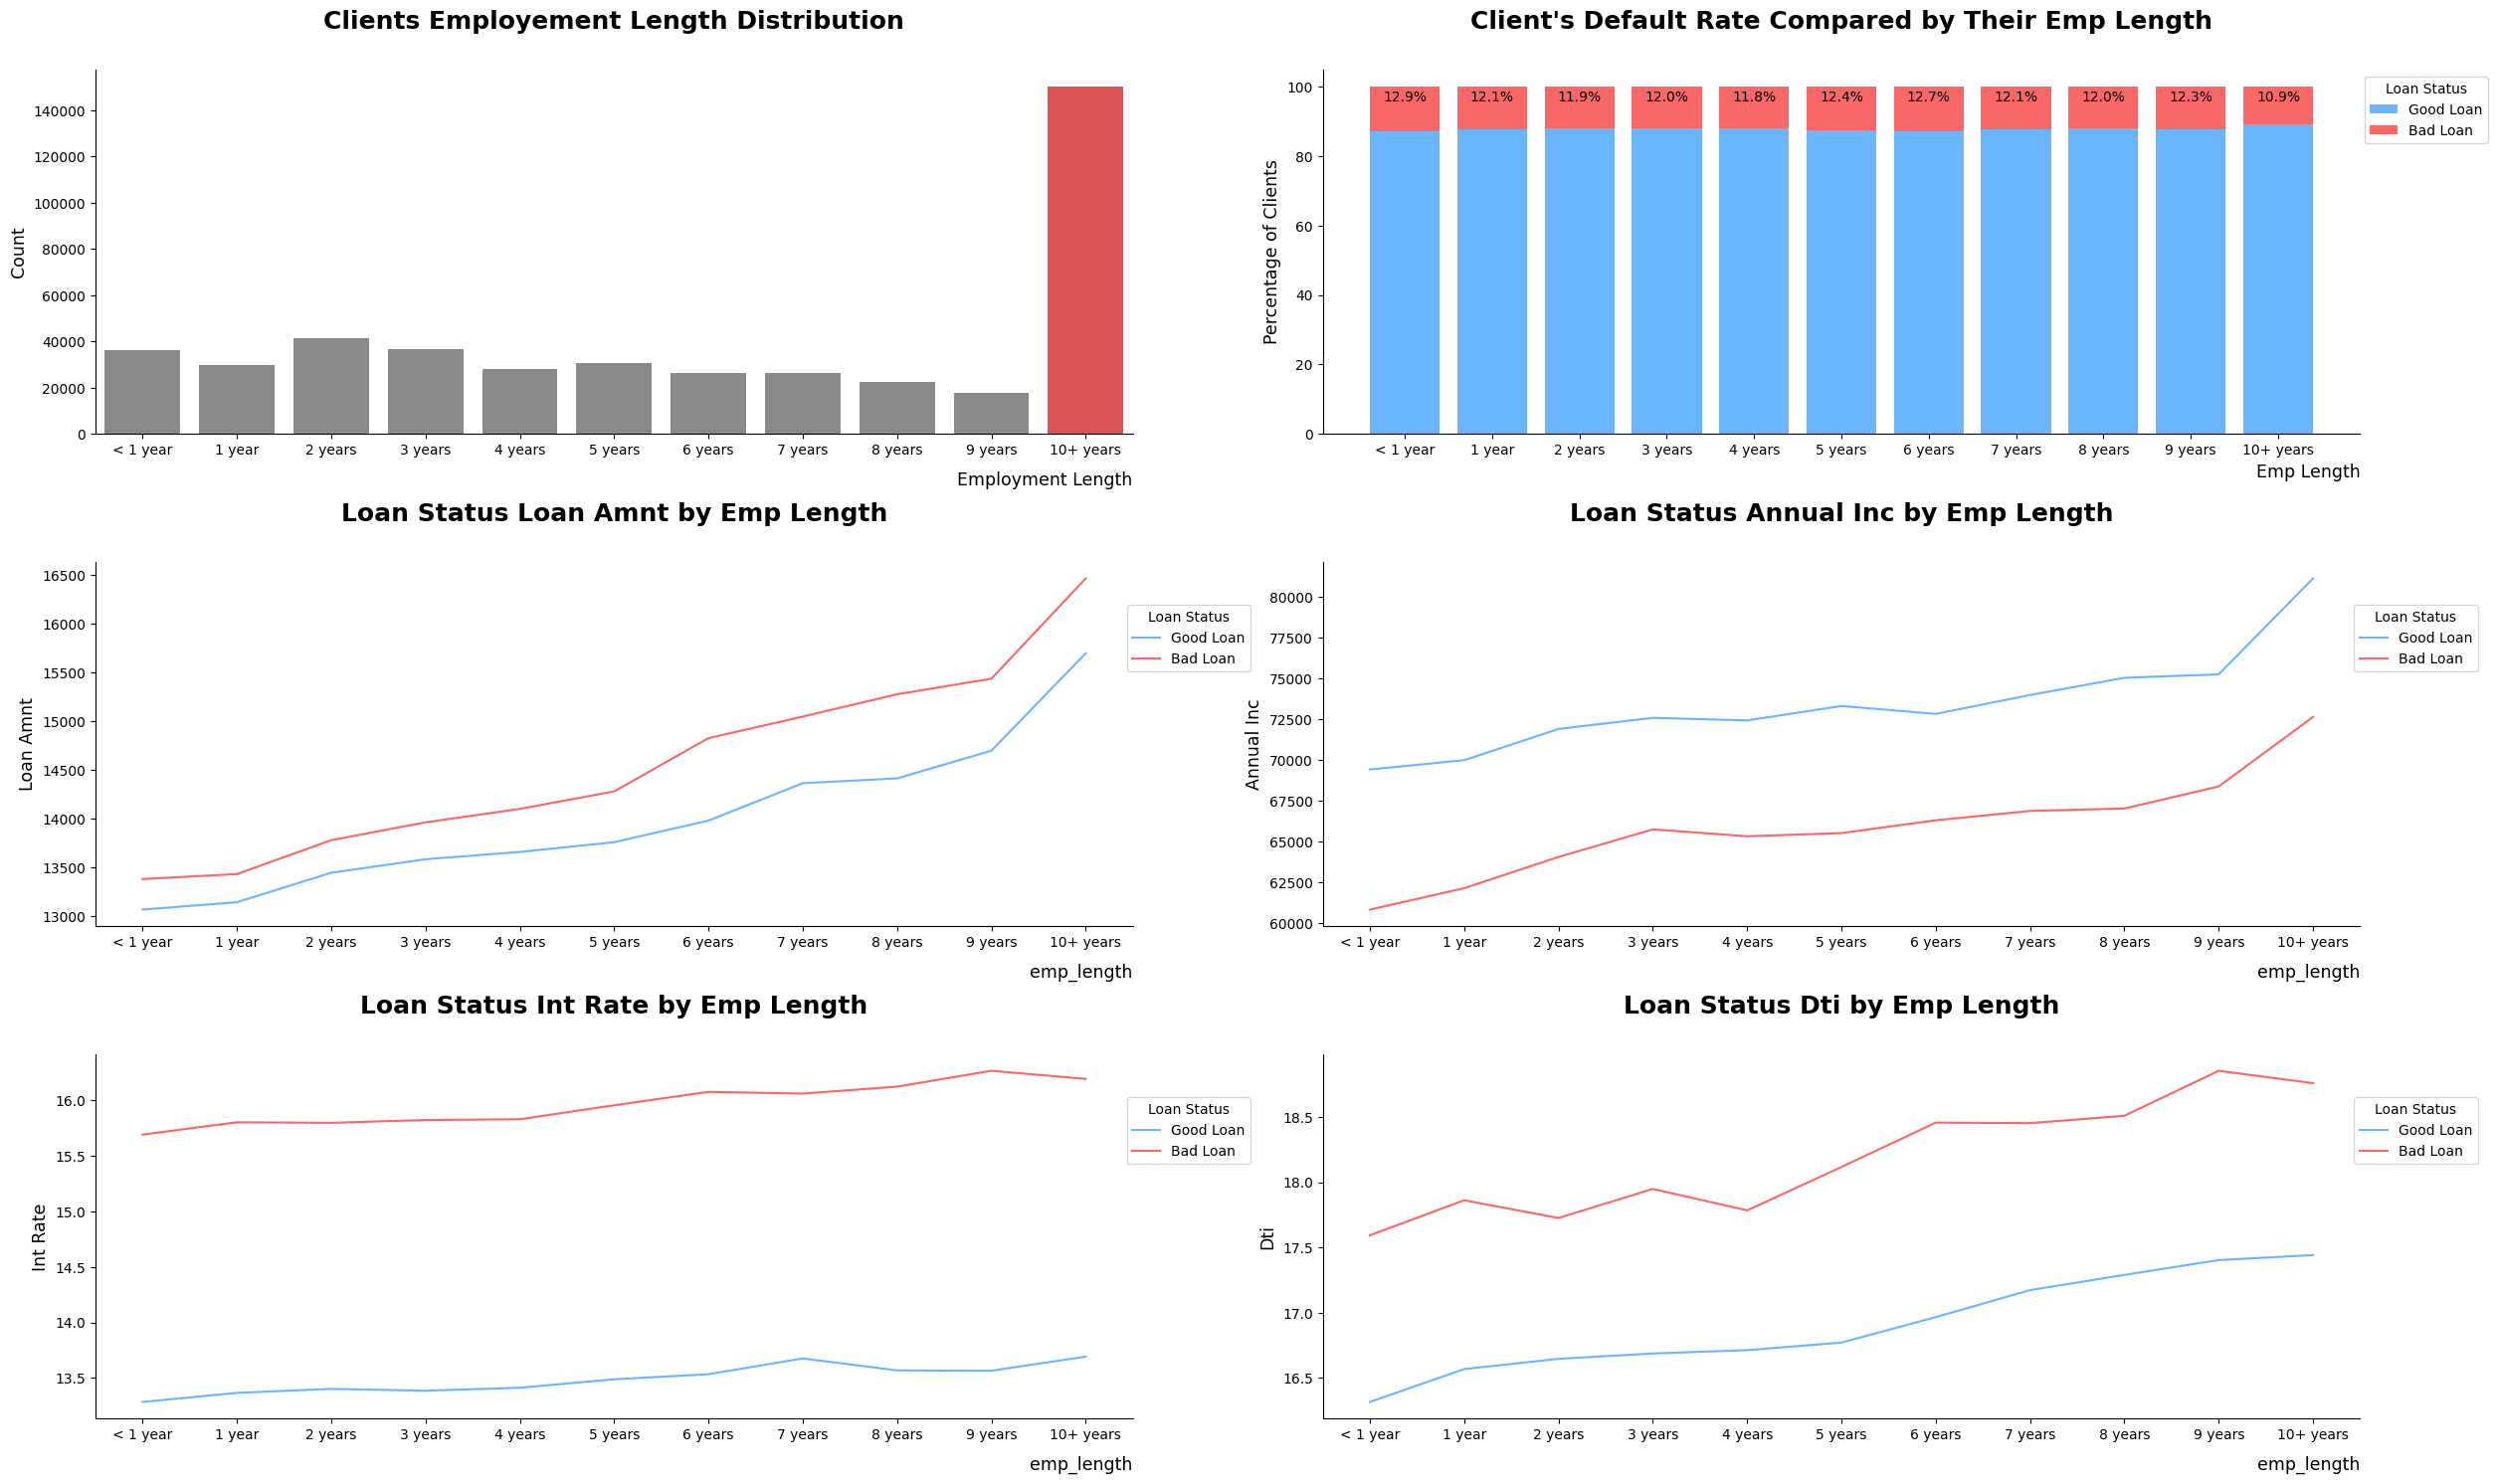

In [21]:
# Set the figure size
plt.figure(figsize=(25, 15))

# Define the order
length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

# Convert the 'emp_length' column to a categorical type with the specified order
dfloan['emp_length'] = pd.Categorical(dfloan['emp_length'], categories=length_order, ordered=True)

plt.subplot(3, 2, 1)
order_emp = dfloan.emp_length.value_counts().index
palette_length = ['#898989'] * 10 + ['#F13F3F']
sns.countplot(x='emp_length', data=dfloan, order=length_order, palette=palette_length)
plt.title('Clients Employement Length Distribution', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Employment Length', fontsize=12.5, loc='right', labelpad=10)
plt.ylabel('Count', fontsize=12.5)


plt.subplot(3, 2, 2)
create_stacked_barchart(dfloan, 'emp_length', 'loan_status', length_order, target_colors, bbox_to_anchor=(1.13, 1))

plt.subplot(3, 2, 3)
create_lineplot('emp_length', 'loan_amnt', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 4)
create_lineplot('emp_length', 'annual_inc', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 5)
create_lineplot('emp_length', 'int_rate', dfloan, 'loan_status', target_colors, (1.12, 0.9))

plt.subplot(3, 2, 6)
create_lineplot('emp_length', 'dti', dfloan, 'loan_status', target_colors, (1.12, 0.9))
 
plt.tight_layout()
plt.show()

# set the emp_length column back to object dtype
dfloan['emp_length'] = dfloan['emp_length'].astype('object')

**Insight🔎** :<br>
- Most of our clients are employed for more than 10 years, with 10.2% default rate.

- From the lineplot we can see the more the clients employed, the higher the loan amount they have, from that we can see that the Client with bad loan have higher loan amnt than the good clients,

- the clients with good loan by the time they employed, they still have a higher annual income than the bad clients.

- By the time the client employed for 10 years, the good loan clients have a lower interest rate than the bad loan clients.

- and also the good loan clients have lower debt to income ratio than the bad loan clients.
<br>

**Recommendation🌟** :<br>
- Risk-Based Lending with Employment Tenure:
    - Leverage employment tenure as a factor, but prioritize other indicators of creditworthiness. While long employment history (over 10 years with a 10.2% default rate) suggests potential for managing larger loans, it's not the sole indicator of responsible borrowing.

    - Implement a tiered loan structure that considers not just employment tenure, but also debt-to-income ratio, credit score, and loan amount. This allows you to offer:
    
         - Competitive rates and loan terms to low-risk borrowers with long employment history, good credit, and manageable debt.

         - Higher interest rates, stricter terms, or lower maximum loan amounts for higher-risk borrowers (shorter employment tenure, higher debt-to-income ratio, or lower credit score).

- Targeted Marketing and Loan Products:
    - Develop targeted marketing campaigns for clients with long employment history and good creditworthiness. Highlight loan programs with larger limits, potentially lower interest rates, and benefits that appeal to this demographic (e.g., debt consolidation loans for long-term employees).
    - Consider offering loan products specifically tailored for long-term employees who may have lower credit scores. These products could have features like lower loan maximums but with a path to better rates or higher limits upon improvement in credit score.

<!-- - Focus on clients with longer employment lengths. These clients have a lower default rate and are more likely to have a stable income.
- Consider offering loan programs with higher limits for clients with a long employment history (over 10 years). These clients have a lower default rate (10.2% in our data) and can likely manage larger loans.
- Develop a risk-based assessment system that considers both loan amount and employment history. This will allow us to tailor loan offers to each client's specific situation. For example, you might approve a larger loan amount for a long-term employed borrower with a good credit history, even if their loan grade is lower (B or C). -->

### Deepen the causation of higher loan Amouns for bad clients from the Loan purpose and Home ownership

#### Loan Purpose Analysis

In [22]:
# categoric.sample(5)
dfloan.purpose.value_counts()

purpose
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: count, dtype: int64

Because the loan purpose column contains too many unique values that the values proportions are too small, i only take the top 5 loan purpose for the analysis. and for further binning i will make 4 bins for the loan purpose.

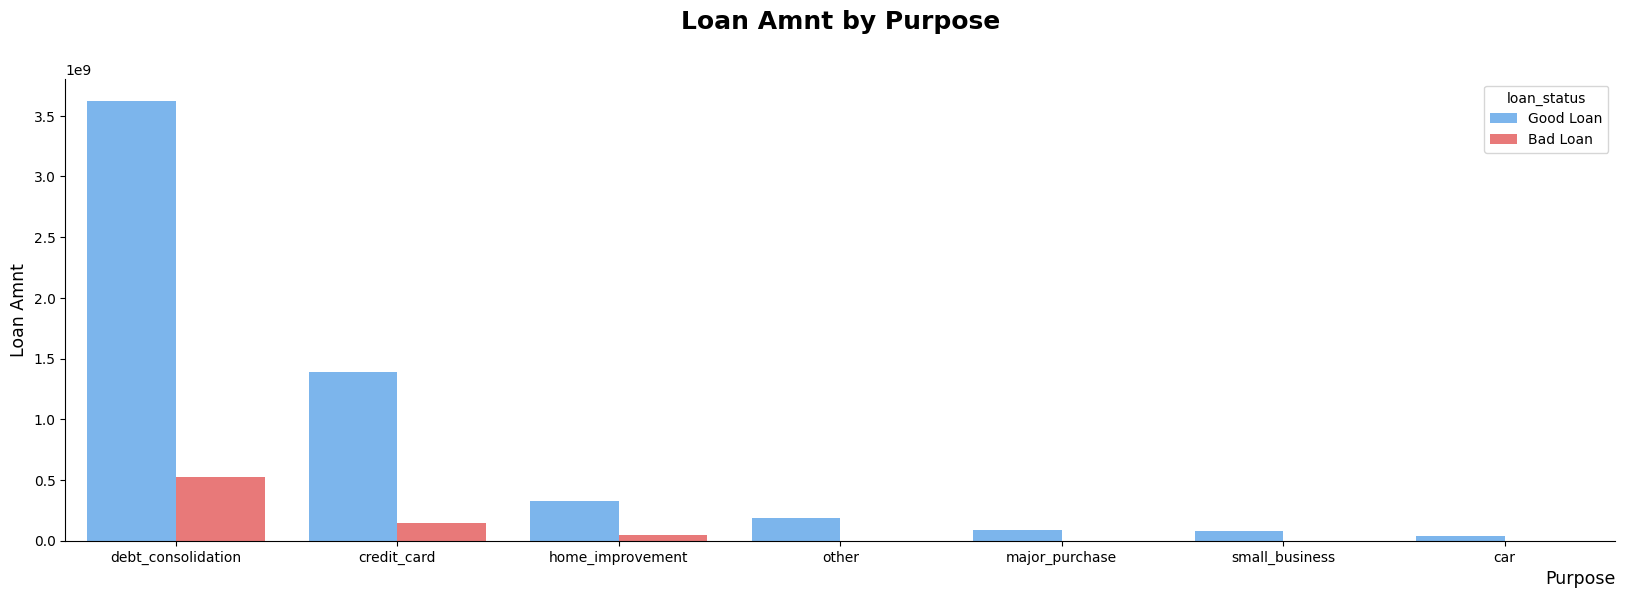

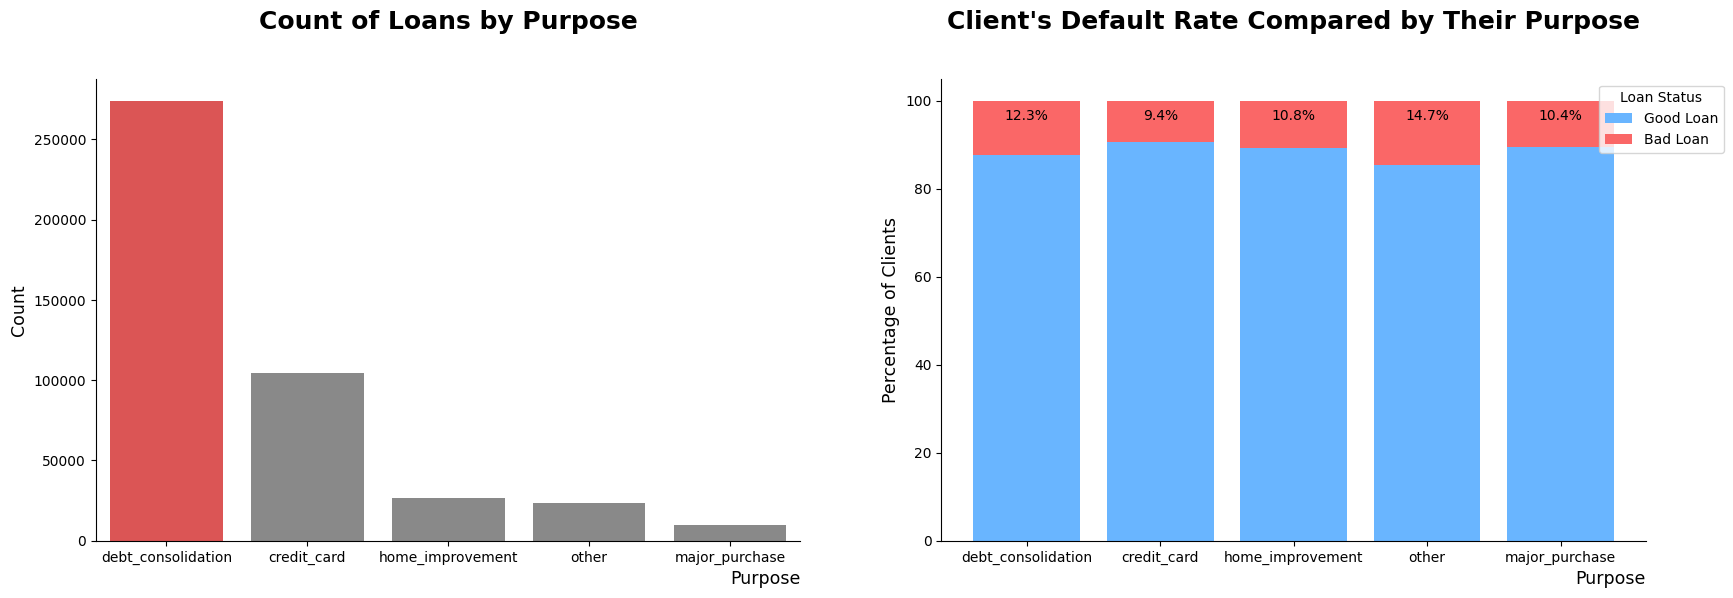

In [23]:
# Get the top 5 purposes by loan count
top_values = dfloan.purpose.value_counts().head(5).index

# FIlet the dataframe to only include the top 5 purposes
top_purpose = dfloan[dfloan.purpose.isin(top_values)]

# define order of the top purposes
order_purp = top_purpose.purpose.value_counts().index

# palette for countplot top purposes highlight
palette_purpose = ['#F13F3F'] + ['#898989'] * 4

# palette for barplot
custpal = ["#1abc9c", "#e67e22", "#f1c40f", "#8e44ad", "#2c3e50", "#27ae60"]

# Set the figure size
plt.figure(figsize=(20, 6))

grp = dfloan.groupby(['purpose', 'loan_status'])['loan_amnt'].sum().reset_index().sort_values(by='loan_amnt', ascending=False)
tophead = grp.head(10)

create_barplot('purpose', 'loan_amnt', tophead, hue='loan_status', palette=target_colors)

# Set the figure size
plt.figure(figsize=(20, 6))

# Creating a subplot for the countplot of loan purposes
# This plot will show the count of loans for each purpose, differentiated by loan status
plt.subplot(1, 2, 1)
create_countplot('purpose', top_purpose, order=order_purp, palette=palette_purpose)

# Creating a subplot for the stacked bar chart of loan purposes
# This plot will show the proportion of each loan status for each loan purpose
plt.subplot(1, 2, 2)
create_stacked_barchart(top_purpose, 'purpose', 'loan_status', order_purp, target_colors, bbox_to_anchor=(1.12, 1))

**Insight🔎** :<br>
- The top 5 loan purpose are Debt consolidation, Credit card, Home improvement, other, and Major purchase.
- Debt consolidation is the most loan purpose with 11.6% default rate.
- Credit Card is the second most loan purpose with slightly lower default rate than Debt consolidation(8.8%).
- Other loan purpose have the highest default rate with 14.1% default rate.

**Recommendation🌟** :<br>
- Target Debt Consolidation and Credit Card Loans with Strategic Refinements:

    - Focus on debt consolidation and credit card loans while strategically managing credit risk. While debt consolidation has a slightly higher default rate (11.6%) than credit cards (8.8%), they both represent opportunities for customer acquisition and potentially higher loan amounts.

- Debt Consolidation Strategy:

    - Develop a competitive debt consolidation loan product with features that attract borrowers, such as:
        - Interest rates that are lower than the average credit card interest rate in our market.
        - Streamlined application process to make it easy for borrowers to consolidate their debt.
        - Flexible loan terms that allow borrowers to choose a repayment plan that fits their budget.

- Credit Card Refinance Strategy:

    - Offer a credit card refinance loan with features that incentivize borrowers to switch from credit cards to your loan, such as:
        - A fixed interest rate that is lower than the borrower's current credit card interest rate.
        - Potential rewards program for on-time payments.
        - Mobile app or online portal for convenient loan management.

#### Home Ownership Analysis

posx and posy should be finite values
posx and posy should be finite values


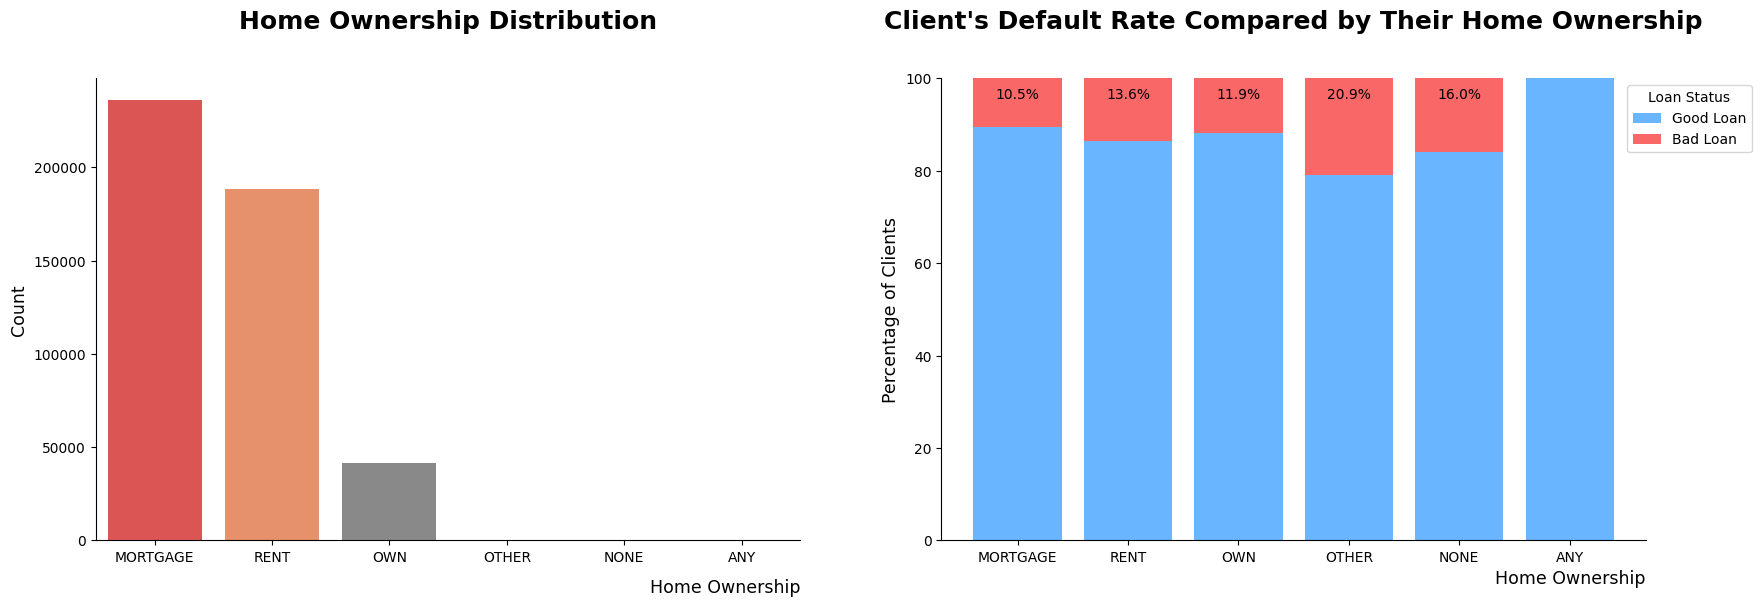

In [24]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
home_order = dfloan.home_ownership.value_counts().index
phome = ['#F13F3F', '#FA8958'] + ['#898989'] * 4
sns.countplot(x='home_ownership', data=dfloan, palette=phome, order=home_order)
plt.title('Home Ownership Distribution', fontsize=18, fontweight='bold', y=1.09)
plt.xlabel('Home Ownership', fontsize=12.5, loc='right', labelpad=10)
plt.ylabel('Count', fontsize=12.5)
sns.despine()

plt.subplot(1, 2, 2)

create_stacked_barchart(dfloan, 'home_ownership', 'loan_status', home_order, target_colors, bbox_to_anchor=(1.16, 1))

plt.show()

**Insight🔎** :<br>
- Most of our clients home ownership status is Mortgage, with 9.9% default rate(this is the lowest default rate between all the values).
- the second most home ownership status is Rent, with 12.1% default rate.
- There's few of our clients that applied for loan with home ownership status if 'Own' (less than 50000 clients), with 11.1% default rate, slightly lower than Rent.
- Home status ownership with 'Other' have the highest default rate with 20.9% default rate, but the number of clients with this status is very small.

**Recommendation🌟** :<br>
- Prioritize Mortgage Holders and Target Renters with Caution:
    - Focus loan efforts on clients with a mortgage (9.9% default rate). This group has the demonstrably lowest default rate, suggesting a more stable financial situation and potentially lower risk.

    - Develop targeted marketing campaigns for renters (12.1% default rate). Highlight the benefits of our loan products, but ensure clear communication of eligibility requirements and responsible borrowing practices.

- Consider Offering Incentives for Owning Property:
    - Explore offering slightly lower interest rates or more favorable loan terms for clients who own their home ("Own" status, 11.1% default rate). Owning property suggests a level of financial commitment that could translate to responsible loan repayment.

- Limited Action on "Other" Category:
    - Due to the small client base for the "Other" homeownership status (20.9% default rate), a data-driven recommendation is difficult. Consider:
        - Investigating the reasons behind the high default rate. This could inform future decisions about including this category in our loan offerings.
        - Potentially excluding the "Other" category from our loan programs if the risk is deemed too high.


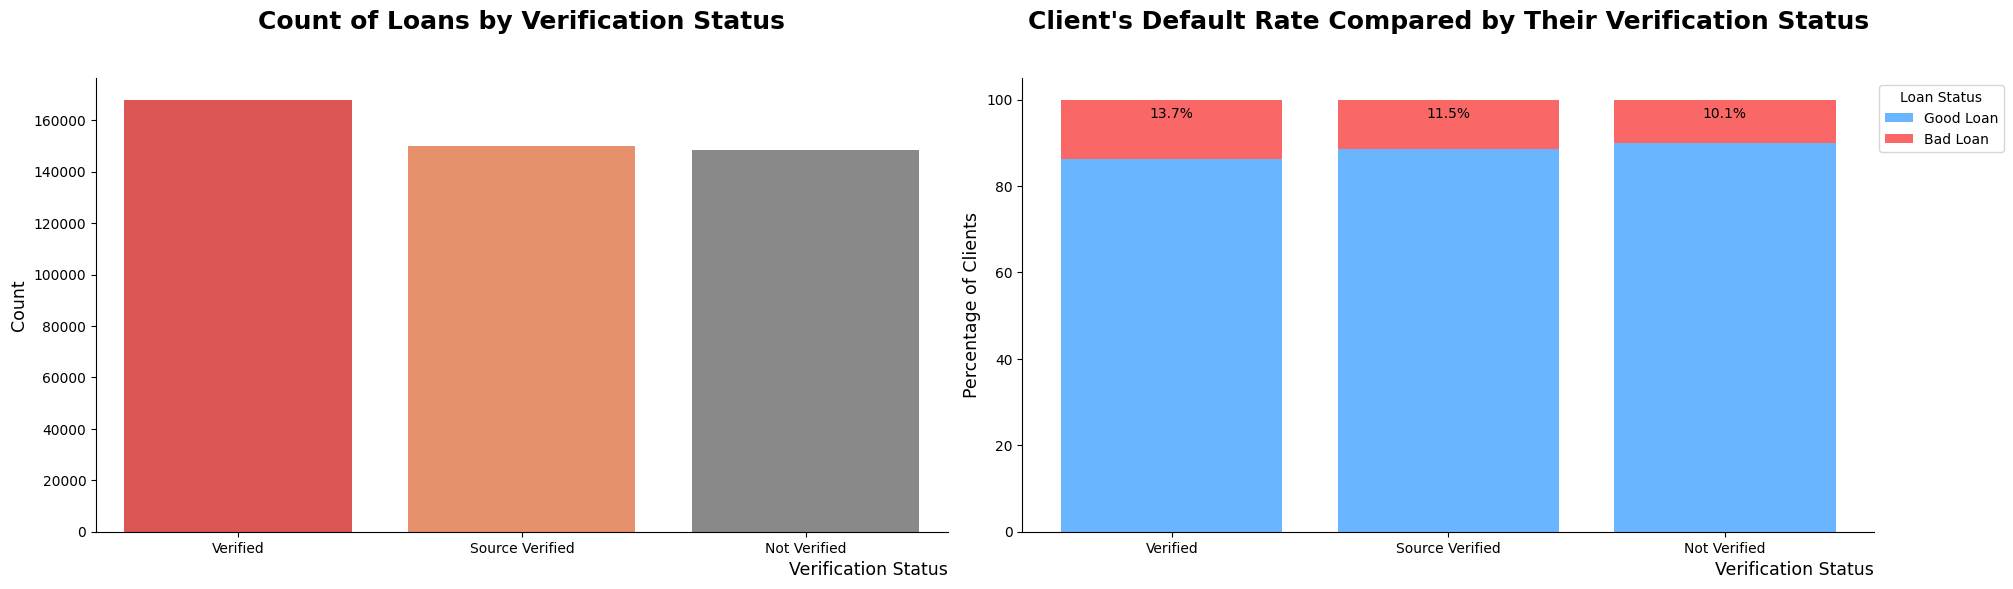

In [25]:
verification_order = dfloan.verification_status.value_counts().index
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
create_countplot('verification_status', dfloan, order=verification_order, palette=phome)

plt.subplot(1, 2, 2)
create_stacked_barchart(dfloan, 'verification_status', 'loan_status', dfloan.verification_status.value_counts().index, target_colors, bbox_to_anchor=(1.16, 1))

sns.despine()
plt.tight_layout()
plt.show()

**Insight🔎** :<br>
- This data insight about loan default rates and client verification status is counterintuitive
- Clients verification statuses verified, source verified, or not verified the value proportions are almost the same, but the default rate for the verified status is the highest than the other two with 13% default rate, but the not verified status have the lowest default rate with 8.8% default rate.

**Recommendation🌟** :<br>
- Investigate the Cause of the High Default Rate for Verified Clients:
    - The finding that verified clients have the highest default rate (13%) while not-verified clients have the lowest (8.8%) is unexpected. Analyze the data further to understand why this might be happening. Here are some possibilities:
        - Verification Process: Is it possible the verification process itself is flawed, allowing some high-risk borrowers to be categorized as verified?
        - Loan Purpose: Are verified clients applying for riskier loan types with higher default rates overall?
        - Selection Bias: Are there any biases in how clients are selected for verification, potentially leading to a higher risk pool in the verified category?

- Refine Verification Process:
    - Regardless of the cause, it's crucial to ensure your verification process is effective in identifying legitimate borrowers. This may involve:
        - Strengthening verification procedures: Double-check identification documents, income verification, and employment status.
        - Considering alternative verification methods: Explore leveraging new technologies or data sources to improve verification accuracy.

## Data Preprocessing

### Drop Columns with High Missing Values


In [26]:
def dropnan(data, threshold):
    """
    Function to drop columns with missing values above a certain threshold.
    
    Parameters:
    data (DataFrame): The data to be cleaned.
    threshold (float): The threshold proportion of missing values, columns above threshold which will be dropped.
    
    Returns:
    DataFrame: The cleaned data with columns dropped based on the threshold.

    Examples:
    >>> dropnan(dfloan, 0.5)
    """

    # Iterate over each column in the DataFrame
    for column in data.columns:
        
        # Calculate the proportion of missing values in the current column
        missing_values = data[column].isnull().sum() / len(data)

        # if the proportion of missing values is greatwer than the threshold
        if missing_values > threshold:
            
            # Drop the current column from the DataFrame
            data = data.drop(columns=column, axis=1)
    
    # Return the cleaned DataFrame
    return data

In [27]:
# Drop the columns with missing values above the threshold
dfloan_cleaned = dropnan(dfloan, 0.4)

print(dfloan.shape)
print(dfloan_cleaned.shape)

(466285, 74)
(466285, 52)


### Drop Uneccessary and Potential Data Leakage Columns
examples:
- `recoveries` & similar columns: This column contains information about post-charge-off gross recovery. Since we are predicting loan default before it happens, this column is considered a data leakage and will be dropped.
- `total_rec_prncp`, `total_rec_int` & `out_prncp` columns : These columns contain information about the total received principal and interest. Since we are predicting loan default before it happens, this column is considered a data leakage and will be dropped.

In [28]:
not_necessary_col = ['sub_grade', 'emp_title', 'pymnt_plan', 'url', 'zip_code', 'title', 'addr_state',
                     'total_acc', 'out_prncp_inv','total_pymnt_inv', 'total_rec_late_fee', 
                     'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
                     'application_type', 'policy_code', 'acc_now_delinq', 'years', 'out_prncp', 'total_rec_prncp']

dfloan_cleaned1 = dfloan_cleaned.drop(columns=not_necessary_col, axis=1)

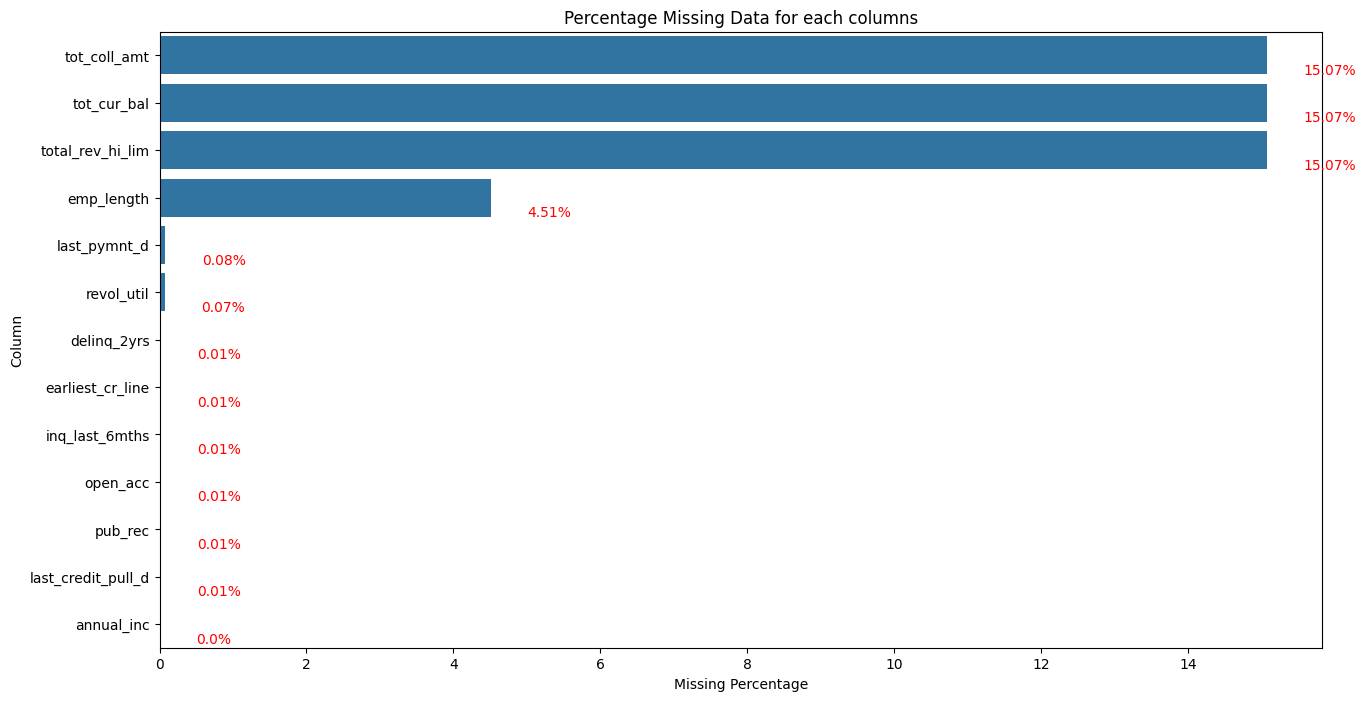

In [29]:
plot_missing_values(dfloan_cleaned1)

### Train Test Split

In [30]:
X = dfloan_cleaned1.drop(columns=['loan_status'])
y = dfloan_cleaned1[['loan_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1103)

print(f'X train shape: {X_train.shape}')
print(f'y train shape:{y_train.shape}')

print(f'\nX test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X train shape: (326399, 31)
y train shape:(326399, 1)

X test shape: (139886, 31)
y_test shape: (139886, 1)


### Impute rest of missing values

In [31]:
# define funtion to fill numerical missing values with median and categorical missing values with mode
def fillnan(data):
    """
    Function to fill missing values in a DataFrame. Numeric columns are filled with the median of the column,
    while categorical/non-numeric columns are filled with the mode.

    Parameters:
    data (DataFrame): The DataFrame to be cleaned.

    Returns:
    DataFrame: The cleaned DataFrame with missing values filled.

    Examples:
    >>> fillnan(data)

    """
    
    # Iterate over each column in the DataFrame
    for column in data.columns:

        # Check if the current column is numeric
        if data[column].dtype in ['int64', 'float64']:
            # Fill missing values with the median of the column
            data[column] = data[column].fillna(data[column].median())
        else:
            # Fill missing values with the mode of the column
            data[column] = data[column].fillna(data[column].mode()[0])
    # Return the cleaned DataFrame
    return data

# Fill missing values in the train set
X_train_clean = fillnan(X_train)

### Feature Selection

#### Chi Square Test for Categorical Columns to see the correlation between the categorical features and the target 

In [32]:
# Create a list to store the results
results = []

cat_select = X_train_clean.select_dtypes('object')

for column in cat_select.columns:
    contingency_table = pd.crosstab(X_train_clean[column], y_train['loan_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Determine dependency status
    if p < 0.05:
        dependency = 'Dependent'
    else:
        dependency = 'Independent'
    
    # Store the results in a tuple and append to the list
    results.append((column, p, dependency))

# Convert the list into a DataFrame
chi_results = pd.DataFrame(results, columns=['Feature', 'p-value', 'Dependency'])

chi_results

,Feature,p-value,Dependency
0,term,0.000000e+00,Dependent
1,grade,0.000000e+00,Dependent
2,emp_length,1.513788e-15,Dependent
3,home_ownership,1.372353e-157,Dependent
4,verification_status,7.535390e-165,Dependent
5,purpose,7.359360e-261,Dependent
6,earliest_cr_line,6.841449e-34,Dependent
7,initial_list_status,1.334674e-121,Dependent
8,last_pymnt_d,0.000000e+00,Dependent
9,last_credit_pull_d,0.000000e+00,Dependent


All the categorical features P-value < 0.05 so we can reject the null hypothesis and conclude that the target variable is dependent on the categorical features.

#### Correlation Matrix for Numerical Columns to see multicollinearity

<Axes: >

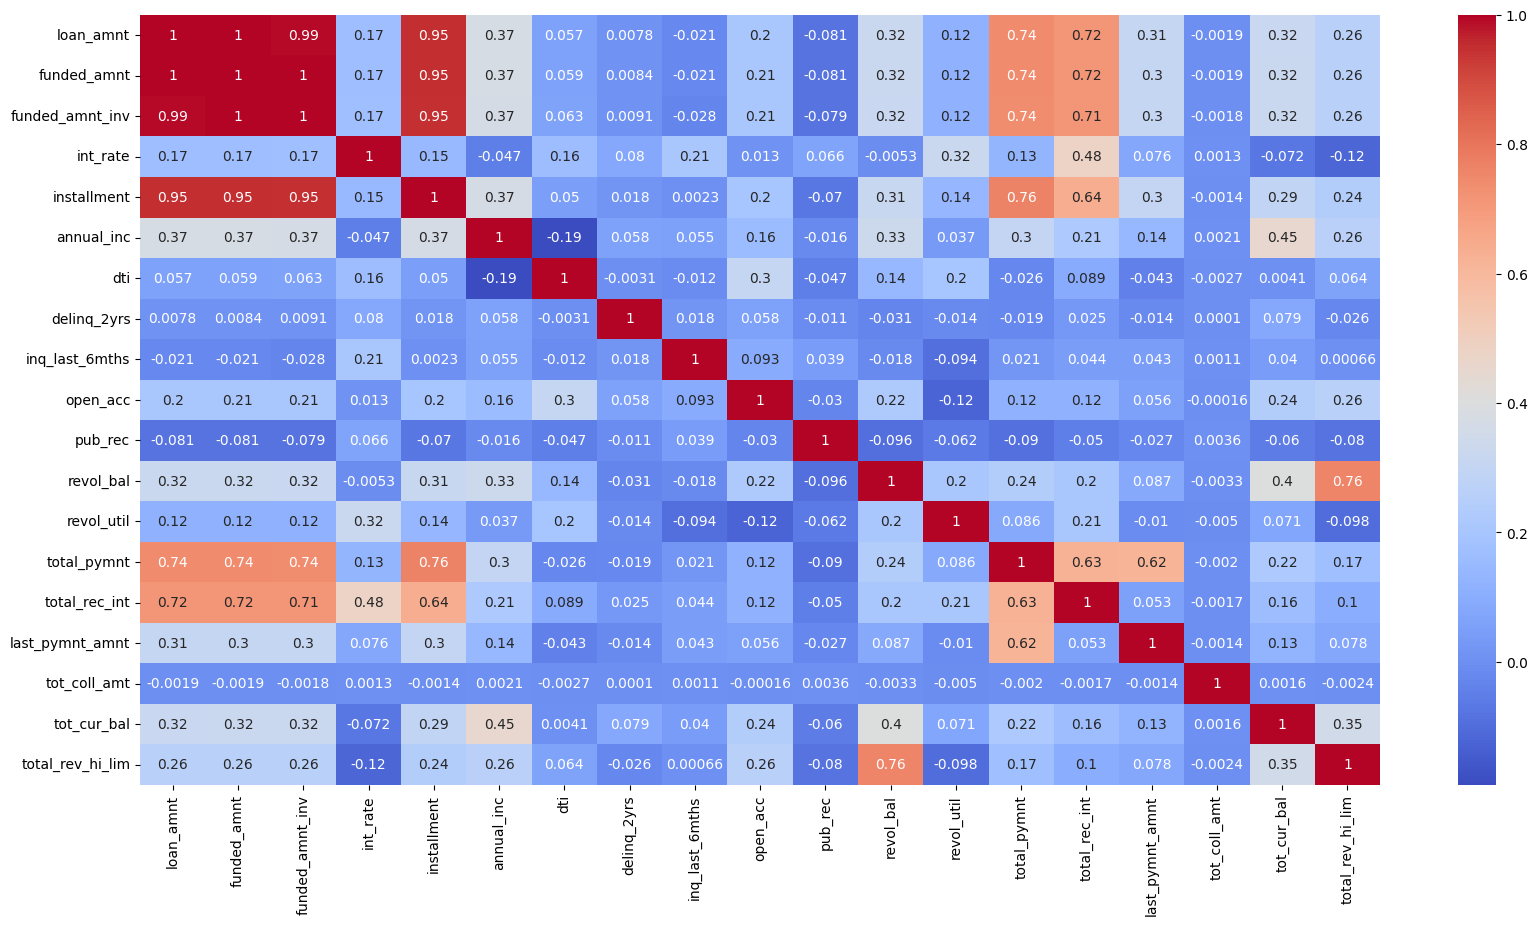

In [33]:
nums = X_train_clean.select_dtypes('number')

dfcorr = nums.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(dfcorr, cmap='coolwarm', annot=True)

In [34]:
# Drop multicollinearity columns
multi_col = ['loan_amnt', 'funded_amnt_inv', 'total_rec_int', 'total_pymnt', 'revol_bal']

X_train_nomulti = X_train_clean.drop(columns=multi_col, axis=1)

#### ANOVA Test to see the relationship between numerical columns and target variable

<Axes: xlabel='p_value', ylabel='column'>

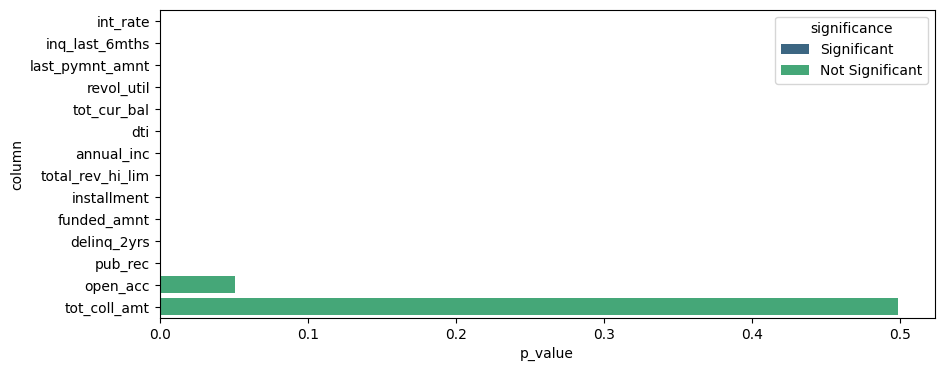

In [35]:
# df_temp = pd.concat([dfloan_selected, y_train], axis=1)
new_nums = X_train_nomulti.select_dtypes('number')

anova_results = pd.DataFrame(columns=['column', 'f_score', 'p_value', 'significance'])

# Perform ANOVA for each numerical column with respect to the target
for i, column in enumerate(new_nums.columns):
    # Separate the data based on the categories in the target
    good =X_train_nomulti[column][y_train['loan_status'] == 'Good Loan']
    bad = X_train_nomulti[column][y_train['loan_status'] == 'Bad Loan']
    
    # Perform the ANOVA test
    f_statistic, p_value = f_oneway(good, bad)

    # Determine the significance
    if p_value < 0.05:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    
    # Append the results to the DataFrame
    anova_results.loc[i] = [column, f_statistic, p_value, significance]

anova_results = anova_results.sort_values('p_value')

plt.figure(figsize=(10, 4))
sns.barplot(x='p_value', y='column', hue='significance', data=anova_results, palette='viridis')

`delinq_2yrs` and `tot_coll_amt` are not significant in ANOVA test, so we can drop them.

In [36]:
# Define a list of columns that are not significant for the model
not_sig = ['delinq_2yrs', 'tot_coll_amt']

# Drop the non-significant columns from the training data
X_train_selected = X_train_nomulti.drop(columns=not_sig, axis=1)

# Display a random sample of 3 rows from the modified training data
X_train_selected.sample(3)

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,region
273899,15000,36 months,12.49,501.74,B,4 years,RENT,53288.0,Source Verified,2014-10-01,debt_consolidation,26.26,Apr-05,1.0,10.0,0.0,75.7,f,Dec-15,501.74,Jan-16,51598.0,22400.0,Northeast
406214,13200,36 months,14.64,455.26,C,2 years,MORTGAGE,110000.0,Source Verified,2014-04-01,debt_consolidation,14.92,Mar-85,0.0,15.0,1.0,45.5,w,Dec-15,455.26,Jan-16,227133.0,40300.0,Northeast
419007,13175,60 months,16.59,324.54,D,10+ years,MORTGAGE,30000.0,Verified,2014-04-01,credit_card,17.60,Oct-98,1.0,7.0,0.0,50.4,f,Jan-16,324.54,Jan-16,276990.0,12800.0,West


### Cap Outliers

In [37]:
# Define function to cap outliers
def cap_outliers(data, cols):
    """
    Function to cap outliers in a DataFrame.

    Parameters:
    data (DataFrame): The DataFrame to be cleaned.
    cols (List): The list of columns to cap outliers in.

    Returns:
    DataFrame: The cleaned DataFrame with outliers capped.

    Examples:
    >>> cap_outliers(X_train, outlier_cols)

    """

    # Iterate over each column in the DataFrame
    for column in cols:
        # Calculate the first quartile
        Q1 = data[column].quantile(0.25)
        # Calculate the third quartile
        Q3 = data[column].quantile(0.75)
        # Calculate the interquartile range
        IQR = Q3 - Q1
        # Calculate the lower bound
        lower_bound = Q1 - 1.5 * IQR
        # Calculate the upper bound
        upper_bound = Q3 + 1.5 * IQR
        # Cap the outliers
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

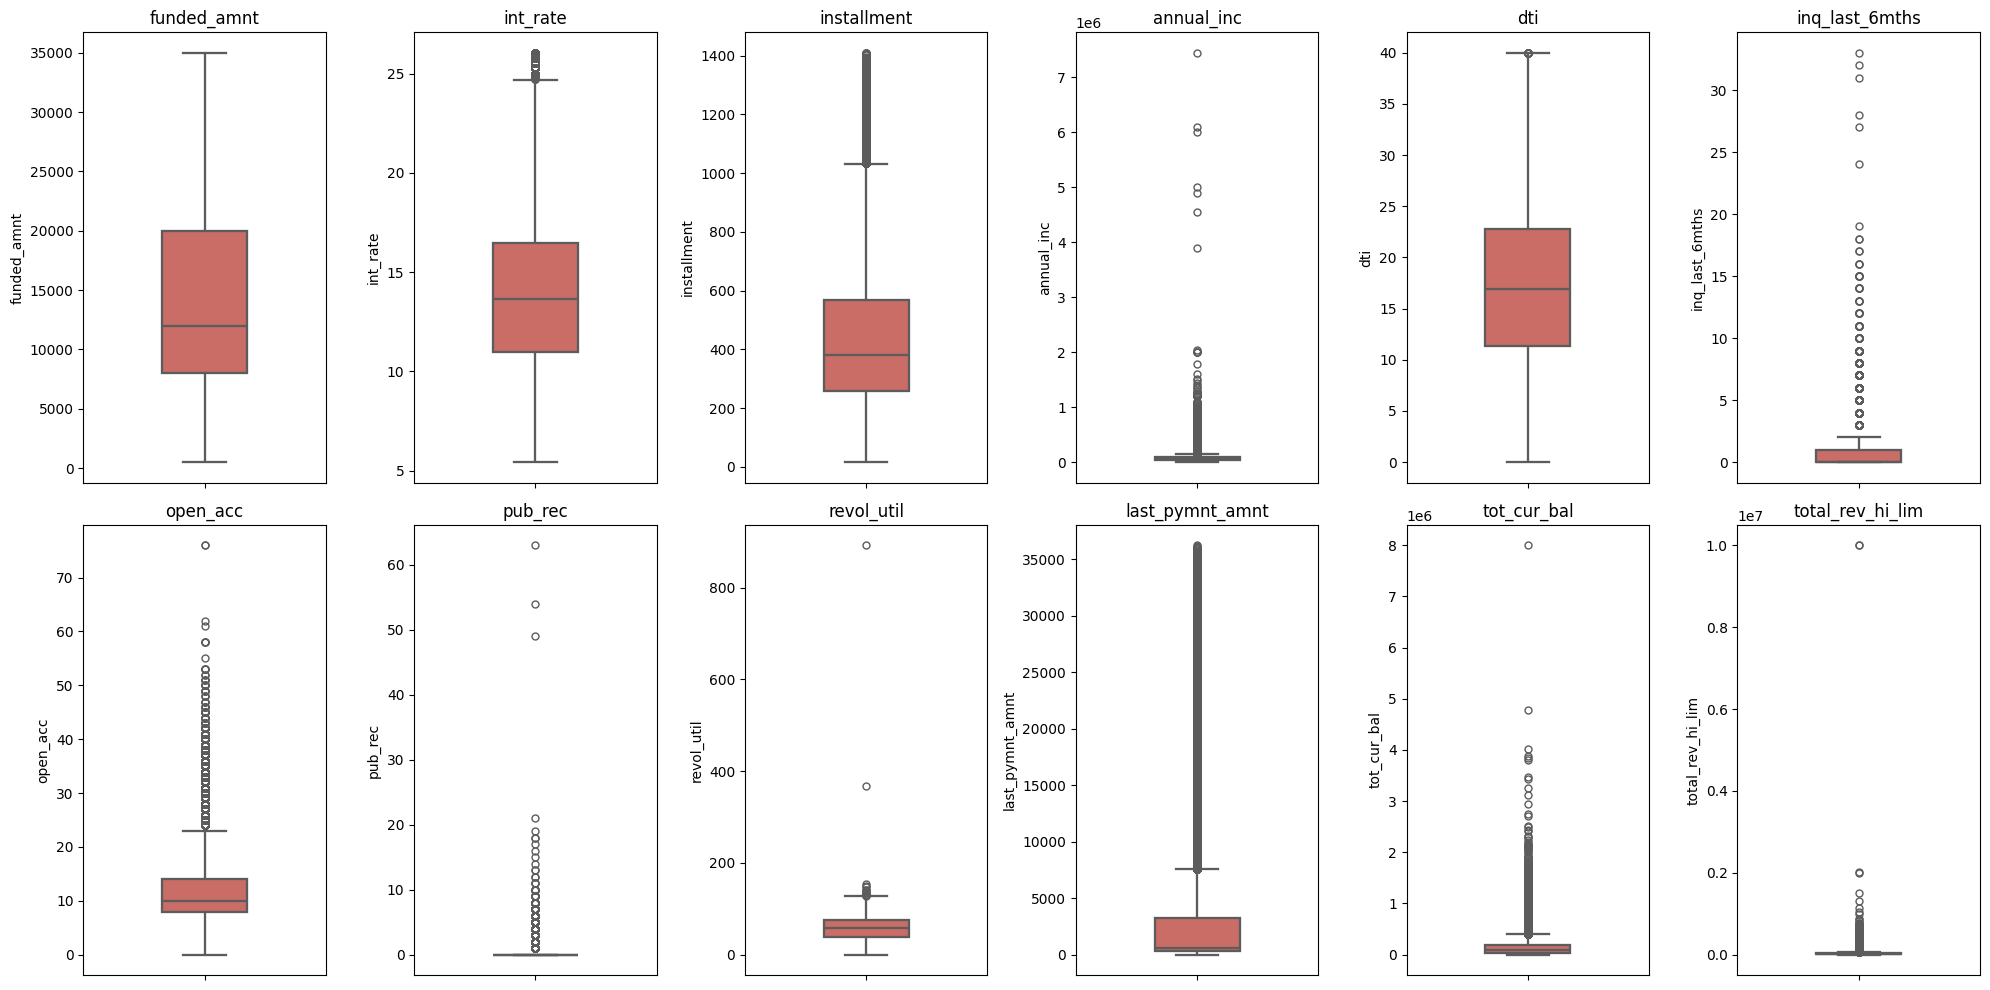

In [38]:
numeric_columns = X_train_selected.select_dtypes('number').columns

# Create a figure with a specific size for plotting
plt.figure(figsize=(20, 10))

# Loop through each column in the new DataFrame
for i, col in enumerate(numeric_columns):
    # Create a subplot for each column
    plt.subplot(2, 6, i+1)
    # Create a boxplot for the current column
    sns.boxplot(y=X_train_selected[col], palette='hls', width=0.35, linewidth=1.65, fliersize=5)
    # Set the title of the subplot to the column name
    plt.title(col)
    # Adjust the layout of the plot
    plt.tight_layout()

# Display the plot
plt.show()

Based on the boxplot above we can see that there's some column that contains outliers:
- `annual_inc`
- `inq_last_6mths`
- `open_acc`
- `pub_rec` (This column will be binned to 2 binary values. yes or no)
- `revol_util`
- `tot_cur_bal`
- `total_rev_hi_lim`
 

In [39]:
# Define a list of columns that have outliers
outliers = ['annual_inc', 'inq_last_6mths', 'open_acc', 'revol_util', 'tot_cur_bal', 'total_rev_hi_lim']

# Use the 'cap_outliers' function to handle outliers in the training data
# The function caps the outliers in the specified columns of the DataFrame
X_train_noutlier = cap_outliers(X_train_selected, outliers)

# Display a random sample of 3 rows from the modified training data
X_train_noutlier.sample(3)

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,region
368702,10000,36 months,11.67,330.57,B,9 years,RENT,48000.0,Source Verified,2014-06-01,debt_consolidation,14.00,Dec-00,0.0,8.0,0.0,60.4,w,Jan-16,330.57,Jan-16,16661.0,10700.0,Northeast
415492,6300,36 months,12.99,212.25,B,6 years,RENT,37500.0,Source Verified,2014-04-01,credit_card,19.07,Aug-09,1.0,7.0,0.0,91.7,w,Jan-16,212.25,Jan-16,21442.0,4400.0,Midwest
202366,8325,36 months,18.75,304.12,D,< 1 year,RENT,24000.0,Source Verified,2012-08-01,debt_consolidation,27.35,Jun-08,2.5,16.0,0.0,72.4,f,Nov-13,5935.35,Sep-15,39451.0,16500.0,Midwest


### Further Feature Engineering

#### Feature Creation

In [40]:
# Create a copy of the selected features for further feature engineering
X_train_eng = X_train_noutlier.copy()

# Define a function to convert a date column into two new columns
def days_month_converter(data, date_col):
    """
    This function converts a date column into two new columns:
    1. days_since_{date_col}: Number of days from the date to the current date.
    2. {date_col}_month: The month of the date.

    Parameters:
    data (DataFrame): The DataFrame containing the date column.
    date_col (str): The name of the date column to convert.

    Returns:
    DataFrame: The updated DataFrame with the new columns and the original date column dropped.

    Examples:
    >>> days_month_converter(dfloan_cleaned, 'issue_d')
    """

    # Convert the date column to datetime format
    data[date_col] = pd.to_datetime(data[date_col], format='%b-%y')

    # Get the current date
    current_date = datetime.datetime.now()

    # Create a new column for the number of days from the date to the current date
    data[f"days_since_{date_col}"] = (current_date - data[date_col]).dt.days

    # Create a new column for the month of the date
    data[f"{date_col}_month"] = data[date_col].dt.month

    # Drop the original date column
    data = data.drop(columns=date_col, axis=1)

    return data

# List of date columns to convert
dates = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']

# Convert the date columns in the list to days and month columns
for date in dates:
   X_train_eng = days_month_converter(X_train_eng, date)


# For 'pub_rec' column, if the value is greater than 0, replace it with 'no', otherwise replace it with 'yes'
X_train_eng['pub_rec'] = X_train_eng['pub_rec'].apply(lambda x: 'no' if x > 0 else 'yes')

# Create a mapping for 'initial_list_status' column
map_istatus = {
    'f': 'fractional',
    'w': 'whole'
}

# Apply the mapping to 'initial_list_status' column
X_train_eng['initial_list_status'] = X_train_eng['initial_list_status'].map(map_istatus)

# Create a mapping for 'home_ownership' column
map_home = {
    'NONE': 'OTHER'  # Map 'NONE' to 'OTHER'
}

# Apply the mapping to 'home_ownership' column
X_train_eng['home_ownership'] = X_train_eng['home_ownership'].replace(map_home)

# Display a random sample of 3 rows from the modified training data
X_train_eng.sample(3)

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,region,days_since_earliest_cr_line,earliest_cr_line_month,days_since_issue_d,issue_d_month,days_since_last_pymnt_d,last_pymnt_d_month,days_since_last_credit_pull_d,last_credit_pull_d_month
436637,13900,36 months,17.57,499.53,D,3 years,RENT,62500.0,Not Verified,credit_card,16.02,0.0,7.0,yes,92.1,fractional,12040.09,39548.0,11100.0,Northeast,7160,9,3720,2,3478,10,3447,11
178624,3625,36 months,18.49,131.95,D,5 years,MORTGAGE,73500.0,Not Verified,debt_consolidation,13.32,2.5,5.0,yes,84.6,fractional,3114.91,327041.0,5700.0,West,8256,9,4147,12,3904,8,3873,9
187991,18000,36 months,11.14,590.50,B,10+ years,OWN,78000.0,Not Verified,debt_consolidation,16.47,0.0,9.0,yes,36.2,whole,590.11,48134.0,59700.0,Midwest,12152,1,4177,11,3082,11,3021,1


#### Feature Encoding

In [41]:
# create a copy of X_train
X_train_enc = X_train_eng.copy()

# List of columns to be one-hot encoded
col_to_ohe = X_train_enc.select_dtypes('object').columns

# Perform one-hot encoding on each column in the list
for column in col_to_ohe:
    # Create dummy variables for each unique category in the column
    dummies = pd.get_dummies(X_train_enc[column], prefix=f'{column}:').astype(int)
    
    # Concatenate the dummy variables with the original DataFrame
    X_train_enc = pd.concat([X_train_enc, dummies], axis=1)
    
    # Drop the original column from the DataFrame
    X_train_enc.drop(columns=column, axis=1, inplace=True)


# Define a mapping for 'loan_status' column values
map_target = {
    'Good Loan': 0,  # Map 'Good Loan' to 0
    'Bad Loan': 1    # Map 'Bad Loan' to 1
}

# Apply the mapping to the target train and test
y_train['loan_status'] = y_train['loan_status'].map(map_target)

# Display encoded training data shape, a random sample of 3 rows and target
print(X_train_enc.shape)
display(X_train_enc.sample(3))
display(y_train.sample(3))

(326399, 69)


,funded_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_util,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,days_since_earliest_cr_line,earliest_cr_line_month,days_since_issue_d,issue_d_month,days_since_last_pymnt_d,last_pymnt_d_month,days_since_last_credit_pull_d,last_credit_pull_d_month,term:_ 36 months,term:_ 60 months,grade:_A,grade:_B,grade:_C,grade:_D,grade:_E,grade:_F,grade:_G,emp_length:_1 year,emp_length:_10+ years,emp_length:_2 years,emp_length:_3 years,emp_length:_4 years,emp_length:_5 years,emp_length:_6 years,emp_length:_7 years,emp_length:_8 years,emp_length:_9 years,emp_length:_< 1 year,home_ownership:_MORTGAGE,home_ownership:_OTHER,home_ownership:_OWN,home_ownership:_RENT,verification_status:_Not Verified,verification_status:_Source Verified,verification_status:_Verified,purpose:_car,purpose:_credit_card,purpose:_debt_consolidation,purpose:_educational,purpose:_home_improvement,purpose:_house,purpose:_major_purchase,purpose:_medical,purpose:_moving,purpose:_other,purpose:_renewable_energy,purpose:_small_business,purpose:_vacation,purpose:_wedding,pub_rec:_no,pub_rec:_yes,initial_list_status:_fractional,initial_list_status:_whole,region:_Midwest,region:_Northeast,region:_Southeast,region:_Southwest,region:_West
445326,17550,19.97,464.68,49000.0,18.56,2.0,15.0,58.8,464.68,134925.0,32000.0,8287,8,3720,2,3021,1,3021,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
131536,18000,11.14,392.63,90000.0,10.80,0.0,9.0,40.0,12979.01,125091.0,37500.0,9656,11,3965,6,3296,4,3113,10,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
366748,35000,13.35,1185.20,80000.0,18.00,0.0,16.0,48.2,1185.20,47752.0,63250.0,13217,2,3600,6,3021,1,3021,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


,loan_status
54955,0
28692,0
101677,0


### Feature Scaling

In [42]:
# Initialize a StandardScaler
scaler = StandardScaler()

# Scale the numerical columns and convert the result into a DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc))

# Assign the original column names to the scaled DataFrame
X_train_scaled.columns = X_train_enc.columns

# Make sure the indices of the encoded DataFrame match with the previous encoded train DataFrame
X_train_scaled.index = X_train_enc.index

# Display scaled training data shape and a random sample of 3 rows
print(X_train_scaled.shape)
display(X_train_scaled.sample(3))

(326399, 69)


,funded_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_util,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,days_since_earliest_cr_line,earliest_cr_line_month,days_since_issue_d,issue_d_month,days_since_last_pymnt_d,last_pymnt_d_month,days_since_last_credit_pull_d,last_credit_pull_d_month,term:_ 36 months,term:_ 60 months,grade:_A,grade:_B,grade:_C,grade:_D,grade:_E,grade:_F,grade:_G,emp_length:_1 year,emp_length:_10+ years,emp_length:_2 years,emp_length:_3 years,emp_length:_4 years,emp_length:_5 years,emp_length:_6 years,emp_length:_7 years,emp_length:_8 years,emp_length:_9 years,emp_length:_< 1 year,home_ownership:_MORTGAGE,home_ownership:_OTHER,home_ownership:_OWN,home_ownership:_RENT,verification_status:_Not Verified,verification_status:_Source Verified,verification_status:_Verified,purpose:_car,purpose:_credit_card,purpose:_debt_consolidation,purpose:_educational,purpose:_home_improvement,purpose:_house,purpose:_major_purchase,purpose:_medical,purpose:_moving,purpose:_other,purpose:_renewable_energy,purpose:_small_business,purpose:_vacation,purpose:_wedding,pub_rec:_no,pub_rec:_yes,initial_list_status:_fractional,initial_list_status:_whole,region:_Midwest,region:_Northeast,region:_Southeast,region:_Southwest,region:_West
401353,-1.455108,-0.307567,-1.465291,0.878181,-0.081204,1.479540,-0.019799,0.967990,-0.153920,2.520210,-0.758539,-0.644540,-1.671436,-0.504606,-0.929895,0.915303,-0.045108,1.655654,0.608376,0.615878,-0.615878,-0.437143,1.549922,-0.605641,-0.444583,-0.28816,-0.170838,-0.08525,3.837484,-0.761053,-0.312057,-0.291761,-0.253311,-0.264879,-0.24329,-0.243714,-0.225378,-0.198739,-0.291495,-1.011404,-0.022828,3.192768,-0.824129,1.465995,-0.689606,-0.750266,-0.108069,-0.535346,-1.196300,-0.030077,4.067964,-0.069678,-0.14547,-0.099063,-0.080605,-0.232141,-0.027183,-0.123978,-0.073166,-0.071454,-0.389280,0.389280,-1.362684,1.362684,-0.450427,1.807790,-0.557501,-0.361182,-0.568927
368613,-0.518870,-0.495727,-0.417264,-1.340286,2.148352,-0.839672,-0.449937,0.807591,-0.503626,-0.896475,-0.764739,-0.846964,0.359634,-0.644201,-0.326850,-0.568008,1.553984,-0.419805,-0.544727,0.615878,-0.615878,-0.437143,1.549922,-0.605641,-0.444583,-0.28816,-0.170838,-0.08525,-0.260587,-0.761053,-0.312057,-0.291761,-0.253311,-0.264879,-0.24329,-0.243714,-0.225378,-0.198739,3.430585,-1.011404,-0.022828,-0.313208,1.213402,-0.682131,1.450103,-0.750266,-0.108069,1.867950,-1.196300,-0.030077,-0.245823,-0.069678,-0.14547,-0.099063,-0.080605,-0.232141,-0.027183,-0.123978,-0.073166,-0.071454,-0.389280,0.389280,-1.362684,1.362684,-0.450427,1.807790,-0.557501,-0.361182,-0.568927
146205,0.332805,0.903999,0.747999,-0.659956,-0.307852,1.479540,-0.449937,-0.450270,2.281196,-0.111413,-1.018915,1.882248,-0.800977,0.330676,-0.929895,1.458415,1.097101,0.621327,0.031824,0.615878,-0.615878,-0.437143,-0.645194,-0.605641,2.249300,-0.28816,-0.170838,-0.08525,-0.260587,1.313968,-0.312057,-0.291761,-0.253311,-0.264879,-0.24329,-0.243714,-0.225378,-0.198739,-0.291495,0.988725,-0.022828,-0.313208,-0.824129,-0.682131,-0.689606,1.332860,-0.108069,-0.535346,0.835911,-0.030077,-0.245823,-0.069678,-0.14547,-0.099063,-0.080605,-0.232141,-0.027183,-0.123978,-0.073166,-0.071454,2.568848,-2.568848,0.733846,-0.733846,-0.450427,-0.553162,-0.557501,-0.361182,1.757696


### Resample Data

In [43]:
# Instantiate the SMOTE class with a specific random state for reproducibility
smot = SMOTE(random_state=1103)

# Use the fit_resample method of the SMOTE object to oversample the minority class in the training data
X_train_ovr, y_train_ovr = smot.fit_resample(X_train_scaled, y_train)

# Print the distribution of the target variable before resampling
print(f"Target before Resampled:\n{y_train.value_counts()}")

# Print the distribution of the target variable after resampling
print(f"\nTarget after Resampled:\n{y_train_ovr.value_counts()}")

Target before Resampled:
loan_status
0              287726
1               38673
Name: count, dtype: int64

Target after Resampled:
loan_status
0              287726
1              287726
Name: count, dtype: int64


### Update all the processing to data Test
(Handle missing values & Feature encoding only)

In [44]:
# Fill missing values in the test dataset
X_test_clean = fillnan(X_test)

# Drop the columns that have multicollinearity from the cleaned test dataset
X_test_nomulti = X_test_clean.drop(columns=multi_col, axis=1)

# Drop the columns that are not significant from the dataset without multicollinearity
X_test_selected = X_test_nomulti.drop(columns=not_sig, axis=1)

# Create a copy of the selected features for further feature engineering
X_test_eng = X_test_selected.copy()

# Convert the date columns in the list to days and month columns
for date in dates:
   X_test_eng = days_month_converter(X_test_eng, date)

# For 'pub_rec' column, if the value is greater than 0, replace it with 'no', otherwise replace it with 'yes'
X_test_eng['pub_rec'] = X_test_eng['pub_rec'].apply(lambda x: 'no' if x > 0 else 'yes')

# Apply the mapping to 'initial_list_status' column
X_test_eng['initial_list_status'] = X_test_eng['initial_list_status'].map(map_istatus)

# Create a mapping for 'home_ownership' column
map_home = {
    'NONE': 'OTHER',  # Map 'NONE' to 'OTHER'
    'ANY': 'OTHER' # Map 'ANY' to 'OTHER'
}

# Apply the mapping to 'home_ownership' column
X_test_eng['home_ownership'] = X_test_eng['home_ownership'].replace(map_home)

# Create a copy of X_test
X_test_enc = X_test_eng.copy()

# List of columns to be one-hot encoded
col_to_ohe = X_test_enc.select_dtypes('object').columns

# Perform one-hot encoding on each column in the list
for column in col_to_ohe:
    # Create dummy variables for each unique category in the column
    dummies = pd.get_dummies(X_test_enc[column], prefix=f'{column}:').astype(int)
    
    # Concatenate the dummy variables with the original DataFrame
    X_test_enc = pd.concat([X_test_enc, dummies], axis=1)
    
    # Drop the original column from the DataFrame
    X_test_enc.drop(columns=column, axis=1, inplace=True)

# Apply the mapping to the target test
y_test['loan_status'] = y_test['loan_status'].map(map_target)

# Scale the test data using the StandardScaler object
X_test_scaled = pd.DataFrame(scaler.transform(X_test_enc))

# Assign the original column names to the scaled DataFrame
X_test_scaled.columns = X_test_enc.columns

# Make sure the indices of the encoded DataFrame match with the original DataFrame
X_test_scaled.index = X_test_enc.index

# Display scaled test data shape and a random sample of 3 rows
print(X_test_scaled.shape)
display(X_test_scaled.sample(3))
display(y_test.sample(3))

(139886, 69)


,funded_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_util,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,days_since_earliest_cr_line,earliest_cr_line_month,days_since_issue_d,issue_d_month,days_since_last_pymnt_d,last_pymnt_d_month,days_since_last_credit_pull_d,last_credit_pull_d_month,term:_ 36 months,term:_ 60 months,grade:_A,grade:_B,grade:_C,grade:_D,grade:_E,grade:_F,grade:_G,emp_length:_1 year,emp_length:_10+ years,emp_length:_2 years,emp_length:_3 years,emp_length:_4 years,emp_length:_5 years,emp_length:_6 years,emp_length:_7 years,emp_length:_8 years,emp_length:_9 years,emp_length:_< 1 year,home_ownership:_MORTGAGE,home_ownership:_OTHER,home_ownership:_OWN,home_ownership:_RENT,verification_status:_Not Verified,verification_status:_Source Verified,verification_status:_Verified,purpose:_car,purpose:_credit_card,purpose:_debt_consolidation,purpose:_educational,purpose:_home_improvement,purpose:_house,purpose:_major_purchase,purpose:_medical,purpose:_moving,purpose:_other,purpose:_renewable_energy,purpose:_small_business,purpose:_vacation,purpose:_wedding,pub_rec:_no,pub_rec:_yes,initial_list_status:_fractional,initial_list_status:_whole,region:_Midwest,region:_Northeast,region:_Southeast,region:_Southwest,region:_West
349086,-0.026589,1.011847,-0.299494,-0.896593,-0.291299,0.319934,-0.449937,-1.235378,-0.498462,-0.904939,-0.758539,-1.198227,-0.510824,-0.712854,-0.025327,-0.647426,-0.958874,-0.419805,-0.544727,-1.623697,1.623697,-0.437143,-0.645194,-0.605641,2.249300,-0.28816,-0.170838,-0.08525,-0.260587,-0.761053,-0.312057,-0.291761,-0.253311,3.775315,-0.243290,-0.243714,-0.225378,-0.198739,-0.291495,-1.011404,-0.022828,-0.313208,1.213402,-0.682131,1.450103,-0.750266,-0.108069,-0.535346,0.835911,-0.030077,-0.245823,-0.069678,-0.14547,-0.099063,-0.080605,-0.232141,-0.027183,-0.123978,-0.073166,-0.071454,-0.38928,0.38928,0.733846,-0.733846,-0.450427,-0.553162,-0.557501,-0.361182,1.757696
269390,-1.364504,-0.110229,-1.357208,-0.157104,0.254948,-0.839672,-1.095143,-1.345124,-0.133359,-0.737436,-1.570665,-0.346159,0.649787,-0.923391,0.879240,-0.334880,0.868659,0.100761,1.473203,0.615878,-0.615878,-0.437143,-0.645194,1.651142,-0.444583,-0.28816,-0.170838,-0.08525,-0.260587,-0.761053,3.204548,-0.291761,-0.253311,-0.264879,-0.243290,-0.243714,-0.225378,-0.198739,-0.291495,-1.011404,-0.022828,-0.313208,1.213402,1.465995,-0.689606,-0.750266,-0.108069,-0.535346,0.835911,-0.030077,-0.245823,-0.069678,-0.14547,-0.099063,-0.080605,-0.232141,-0.027183,-0.123978,-0.073166,-0.071454,-0.38928,0.38928,0.733846,-0.733846,-0.450427,1.807790,-0.557501,-0.361182,-0.568927
161063,0.882468,-1.131341,0.062067,-0.062449,-0.645278,0.319934,1.700752,-2.155558,-0.473130,0.253380,5.893449,1.199683,0.359634,0.401618,-1.231418,-0.647426,-0.958874,-0.419805,-0.544727,-1.623697,1.623697,2.287582,-0.645194,-0.605641,-0.444583,-0.28816,-0.170838,-0.08525,-0.260587,-0.761053,-0.312057,-0.291761,-0.253311,-0.264879,4.110314,-0.243714,-0.225378,-0.198739,-0.291495,0.988725,-0.022828,-0.313208,-0.824129,-0.682131,-0.689606,1.332860,-0.108069,-0.535346,0.835911,-0.030077,-0.245823,-0.069678,-0.14547,-0.099063,-0.080605,-0.232141,-0.027183,-0.123978,-0.073166,-0.071454,-0.38928,0.38928,0.733846,-0.733846,-0.450427,-0.553162,-0.557501,2.768684,-0.568927


,loan_status
187426,0
304907,0
341546,0


### Update all the processing to the original data (X and y) for cross validation
(Handle missing values & Feature encoding only)

In [45]:
X_clean = fillnan(X)

X_nomulti = X_clean.drop(columns=multi_col, axis=1)

X_selected = X_nomulti.drop(columns=not_sig, axis=1)

X_eng = X_selected.copy()

# Convert the date columns in the list to days and month columns
for date in dates:
   X_eng = days_month_converter(X_eng, date)

X_eng['pub_rec'] = X_eng['pub_rec'].apply(lambda x: 'no' if x == 0 else 'yes')

X_eng['initial_list_status'] = X_eng['initial_list_status'].map(map_istatus)

map_home = {
    'NONE': 'OTHER',  # Map 'NONE' to 'OTHER'
    'ANY': 'OTHER' # Map 'ANY' to 'OTHER'
}

# Apply the mapping to the 'home_ownership' column
X_eng['home_ownership'] = X_eng['home_ownership'].replace(map_home)

# create a copy of X
X_enc = X_eng.copy()

# List of columns to be one-hot encoded
col_to_ohe = X_enc.select_dtypes('object').columns

# Perform one-hot encoding on each column in the list
for column in col_to_ohe:
    # Create dummy variables for each unique category in the column
    dummies = pd.get_dummies(X_enc[column], prefix=f'{column}:').astype(int)

    # Concatenate the dummy variables with the original DataFrame
    X_enc = pd.concat([X_enc, dummies], axis=1)

    # Drop the original column from the DataFrame
    X_enc.drop(columns=column, axis=1, inplace=True)

cvscaler = StandardScaler()
X_scaled = pd.DataFrame(cvscaler.fit_transform(X_enc))

# Assign the original column names to the scaled DataFrame
X_scaled.columns = X_enc.columns

X_scaled.index = X_enc.index

# Assuming y is your target variable for the new dataset
# Apply the mapping to the target
y['loan_status'] = y['loan_status'].map(map_target)

### Modeling 

#### Define function to Evaluate Model

In [49]:
def evaluate_model(model, X_train, y_train, X_test, y_test, threshold):
    """
    This function evaluates the performance of a given model using various metrics.
    
    Parameters:
    model: The machine learning model to be evaluated.
    X_train: The training data.
    y_train: The labels for the training data.
    X_test: The testing data.
    y_test: The labels for the testing data.
    threshold: The threshold for classifying the output into different classes.
    
    Returns:
    Displays a DataFrame with the evaluation metrics for the model.

    Examples:
    >>> evaluate_model(LogisticRegression(), X_train, y_train, X_test, y_test, 0.5)
    """
    
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the labels for the training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Predict the probabilities of the positive class for the training and testing data
    train_pred_proba = model.predict_proba(X_train)[:, 1]  
    test_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute the ROC AUC scores for the training and testing data
    train_auc = roc_auc_score(y_train, train_pred_proba)
    test_auc = roc_auc_score(y_test, test_pred_proba)

    # Compute the recall scores for the training and testing data
    train_recall = recall_score(y_train, train_pred_proba > threshold)
    test_recall = recall_score(y_test, test_pred_proba > threshold)

    # Compute the precision scores for the training and testing data
    train_precision = precision_score(y_train, train_pred_proba > threshold)
    test_precision = precision_score(y_test, test_pred_proba > threshold)

    # Compute the F1 scores for the training and testing data
    train_f1 = f1_score(y_train, train_pred_proba > threshold)
    test_f1 = f1_score(y_test, test_pred_proba > threshold)

    # Perform Stratified K-Fold Cross Validation and compute the ROC AUC score
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1103)
    cv_score = cross_val_score(model, X_scaled, y, cv=skf, scoring='roc_auc')

    # Create a dictionary with the evaluation metrics
    scoredict = {
        'Model': model.__class__.__name__, 
        'AUC_train': [train_auc], 
        'AUC_test': [test_auc],
        'Recall_train': [train_recall],
        'Recall_test': [test_recall],
        'Precision_train': [train_precision],
        'Precision_test': [test_precision],
        'F1_train': [train_f1], 
        'F1_test': [test_f1],
        'CrossVal_AUC': [cv_score.mean()]
    }

    # Convert the dictionary to a DataFrame
    df_eval = pd.DataFrame(scoredict)
    
    return df_eval

In [52]:
def plot_roc_curve(model, X_train, y_train, X_test, y_test, ax):
    """
    This function plots the Receriver Operating Characteristic (ROC) curve for a given model.

    Parameters:
    model: The machine learning model to be evaluated.
    X_train: The training data.
    y_train: The labels for the training data.
    X_test: The testing data.
    y_test: The labels for the testing data.
    ax: The axes object to plot on.

    Returns:
    A plot of the ROC curve, with the area under the curve (AUC) displayed in the legend.

    Examples:
    >>> plot_orc_curve(LogisticRegression(), X_train, y_train, X_test, y_test, ax)

    """

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the probabilities of the positive calss for the testing data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute the false positive rate,  true positive rate, and thresholds for the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Compute the area under the ROC curve
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'{model.__class__.__name__} AUC = {auc:.2f}')

#### Train and Evaluate Model 

,Model,AUC_train,AUC_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test,CrossVal_AUC
0,LogisticRegression,0.946672,0.935987,0.787541,0.760430,0.919578,0.602951,0.848453,0.672596,0.934076
0,RandomForestClassifier,0.988478,0.943958,0.908041,0.699682,0.982052,0.829845,0.943597,0.759225,0.956271
0,CatBoostClassifier,0.998837,0.982310,0.980092,0.840206,0.997623,0.964047,0.988780,0.897877,0.983379


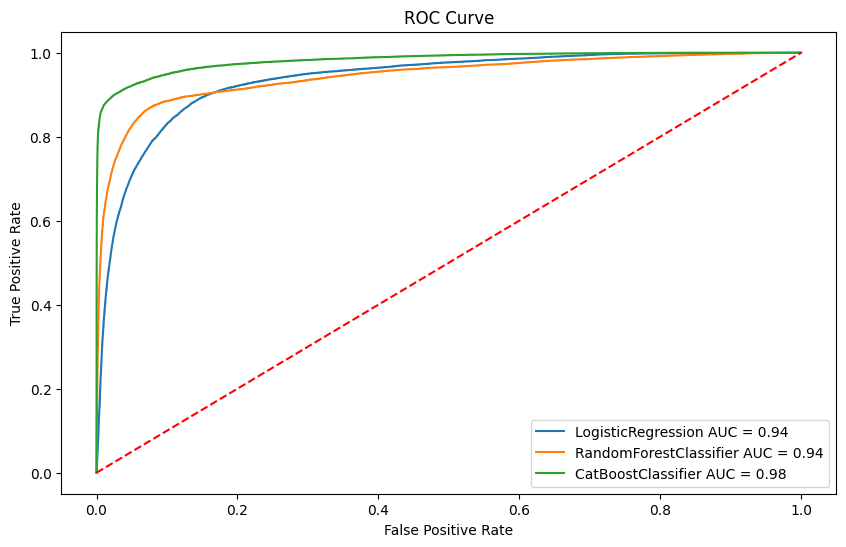

In [65]:
# Instantiate a Logistic Regression model with a specified random state for reproducibility
lr = LogisticRegression(random_state=1103)

# Instantiate a Random Forest model with a specified random state for reproducibility, n_jobs=-1 to use all processors, and a max depth of 10 to prevent overfitting
rf = RandomForestClassifier(n_jobs=-1, max_depth=10, random_state=1103)

# Instantiate a CatBoost model with a specified random state for reproducibility, verbose=False to suppress output, and a max depth of 6 to prevent overfitting
cat = CatBoostClassifier(depth=6, verbose=False, random_state=1103)

# Evaluate all the models using the over-sampled training data, testing data, and a threshold of 0.69
lr_score = evaluate_model(lr, X_train_ovr, y_train_ovr, X_test_scaled, y_test, 0.69)

rf_result = evaluate_model(rf, X_train_ovr, y_train_ovr, X_test_scaled, y_test, 0.69)

cat_result = evaluate_model(cat, X_train_ovr, y_train_ovr, X_test_scaled, y_test, 0.69)

models_result = pd.concat([lr_score, rf_result, cat_result])

display(models_result)

# Plot ROC curve for all the models
# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ROC curve for all the Models using the over-sampled training data and testing data
plot_roc_curve(lr, X_train_ovr, y_train_ovr, X_test_scaled, y_test, ax)
plot_roc_curve(rf, X_train_ovr, y_train_ovr, X_test_scaled, y_test, ax)
plot_roc_curve(cat, X_train_ovr, y_train_ovr, X_test_scaled, y_test, ax)

# Plot the line of no discrimination
ax.plot([0, 1], [0, 1], 'r--')

# Label the x-axis as 'False Positive Rate'
ax.set_xlabel('False Positive Rate')

# Label the y-axis as 'True Positive Rate'
ax.set_ylabel('True Positive Rate')

# Title the plot as 'ROC Curve'
ax.set_title('ROC Curve')

# Display the legend
ax.legend()

# Display the plot
plt.show()

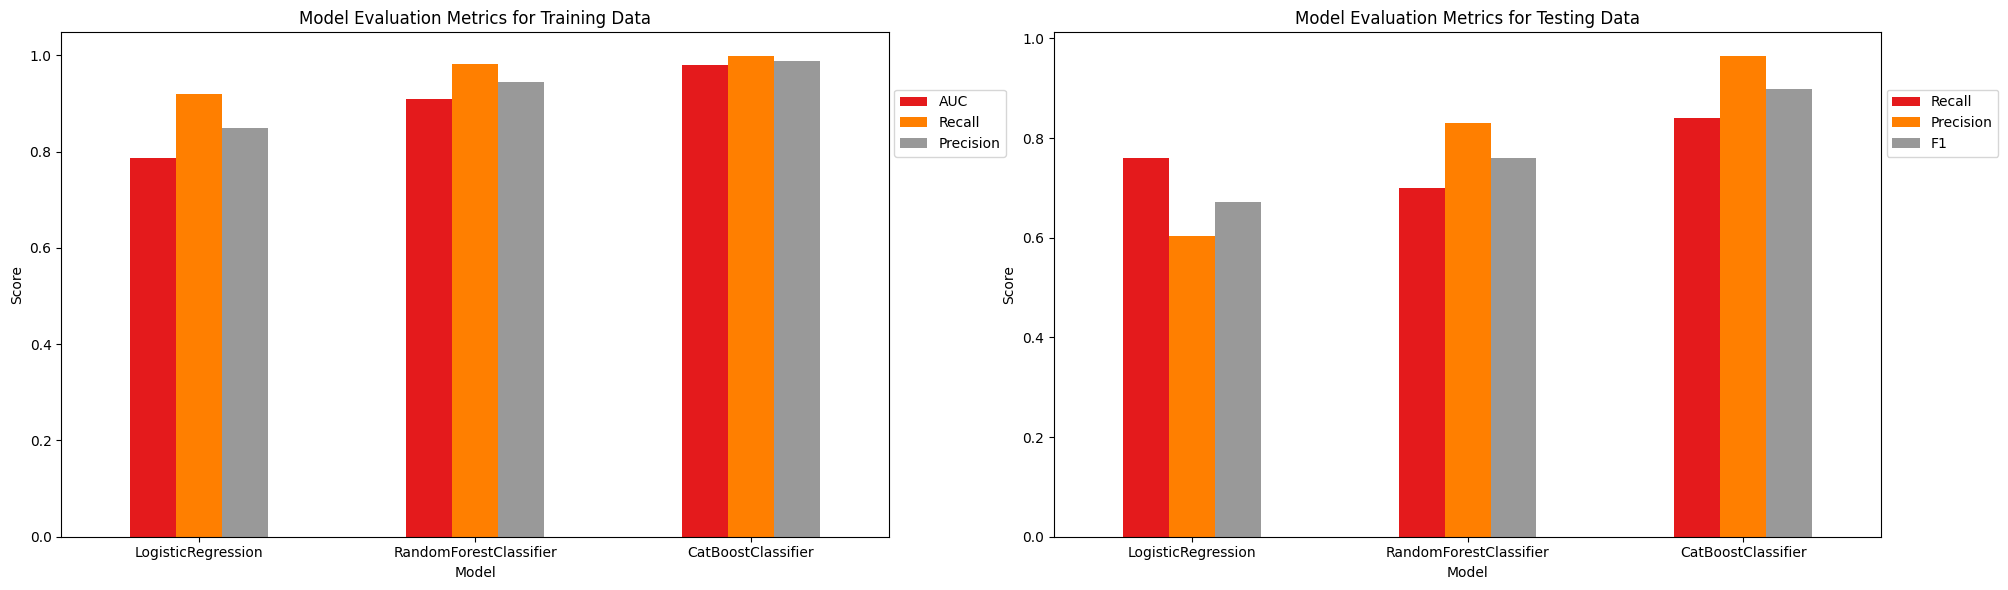

In [101]:
models = models_result.copy()

models.drop(columns='CrossVal_AUC', inplace=True)

models.set_index('Model', inplace=True)

# Create a figure with two subplots: one for train and one for test data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot the metrics for the training data
models[['Recall_train', 'Precision_train', 'F1_train']].plot(kind='bar', ax=axes[0], colormap='Set1')
axes[0].set_title('Model Evaluation Metrics for Training Data')
axes[0].set_ylabel('Score')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(['AUC', 'Recall', 'Precision', 'F1'], bbox_to_anchor=(1.15, 0.9))

# Plot the metrics for the testing data
models[['Recall_test', 'Precision_test', 'F1_test']].plot(kind='bar', ax=axes[1], colormap='Set1')
axes[1].set_title('Model Evaluation Metrics for Testing Data')
axes[1].set_ylabel('Score')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(['Recall', 'Precision', 'F1'], bbox_to_anchor=(1.15, 0.9))

# Display the plot
plt.tight_layout()
plt.show()

| Model                   | AUC_train | AUC_test | Recall_train | Recall_test | Precision_train | Precision_test | F1_train | F1_test | CrossVal_AUC |
|-------------------------|-----------|----------|--------------|-------------|-----------------|----------------|----------|---------|--------------|
| LogisticRegression      | 0.946672  | 0.935987 | 0.787541     | 0.760430    | 0.919578        | 0.602951       | 0.848453 | 0.672596| 0.934076     |
| RandomForestClassifier  | 0.988478  | 0.943958 | 0.908041     | 0.699682    | 0.982052        | 0.829845       | 0.943597 | 0.759225| 0.956271     |
| CatBoostClassifier      | 0.998837  | 0.982310 | 0.980092     | 0.840206    | 0.997623        | 0.964047       | 0.988780 | 0.897877| 0.983379     |

In conclusion, the CatBoost Classifier model outperforms both the Logistic Regression and Random Forest models in our task. This is evident from the higher performance metrics (AUC, Recall, Precision, F1 score) on both the training and test sets. 

The CatBoost Classifier achieved an AUC of 0.998837 on the training set and 0.982310 on the test set, which are significantly higher than the corresponding scores for the other two models. Similarly, the CatBoost Classifier also achieved higher Recall, Precision, and F1 scores. 

This suggests that the CatBoost Classifier is more effective at capturing the underlying patterns in the data and generalizing to unseen data. Therefore, for this particular task, the CatBoost Classifier is the best model among the three we evaluated.

But because the recall on the CatBoost Classifier much lower than the precision i want to lower the threshold for better recall, because i want to minimize the risk of losing money from the bad loan.

#### CatBoostClassifier Threshold Tuning

In [201]:
tcat_result = evaluate_model(cat, X_train_ovr, y_train_ovr, X_test_scaled, y_test, 0.45)
tcat_result

,Model,AUC_train,AUC_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test,CrossVal_AUC
0,CatBoostClassifier,0.998837,0.98231,0.984722,0.865118,0.995006,0.937122,0.989837,0.899682,0.983379


| Threshold | Model              | AUC_train | AUC_test | Recall_train | Recall_test | Precision_train | Precision_test | F1_train | F1_test | CrossVal_AUC |
|-----------|--------------------|-----------|----------|--------------|-------------|-----------------|----------------|----------|---------|--------------|
| 0.6       | CatBoostClassifier | 0.998837  | 0.98231  | 0.982257     | 0.852272    | 0.996829        | 0.955837       | 0.98949  | 0.901088| 0.983379     |
| 0.5       | CatBoostClassifier | 0.998837  | 0.98231  | 0.98402      | 0.861636    | 0.995618        | 0.945088       | 0.989785 | 0.901435| 0.983379     |
| 0.45      | CatBoostClassifier | 0.998837  | 0.98231  | 0.984722     | 0.865118    | 0.995006        | 0.937122       | 0.989837 | 0.899682| 0.983379     |

The optimal Threshold for the CatBoost Classifier model is 0.45, which balances Recall and Precision while maintaining a high F1 score. This threshold value maximizes the model's ability to correctly identify bad loans (Recall) while minimizing the risk of false positives (Precision).<br>
The model does not need to be hyperparameter tuned because the model is already performing well with the default parameters.

### CatBoostClasiifier Feature Importance, Confusion Matrix & Business Impact 

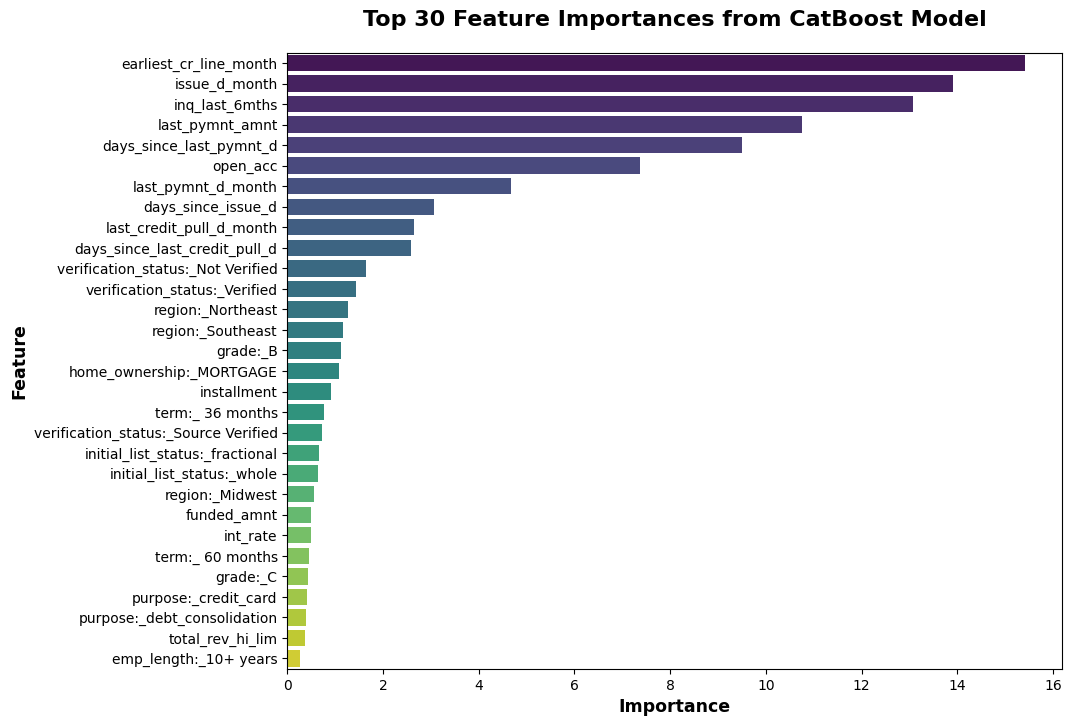

In [122]:
# Get feature importances from the CatBoost model
cat_importances = cat.get_feature_importance()

# Get the names of the features
features = X_train_ovr.columns

# Create a DataFrame with the features and their importances
df_importances = pd.DataFrame({'Feature': features, 'Importance': cat_importances})

# Sort the DataFrame by the feature importances
df_importances = df_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a bar plot of the feature importances
sns.barplot(x='Importance', y='Feature', data=df_importances.head(30), palette='viridis')

# Set the title of the plot
plt.title('Top 30 Feature Importances from CatBoost Model', fontsize=16, fontweight='bold', y=1.03)

# Set the x-axis label of the plot
plt.xlabel('Importance', fontsize=12.5, fontweight='bold')

# Set the y-axis label of the plot
plt.ylabel('Feature', fontsize=12.5, fontweight='bold')

# Display the plot
plt.show()

Summary of the Feature importances from the CatBoost Classifier Model:
1. `earliest_cr_line_month`: This is the most important feature with an importance of 15.43. This could indicate that the length of a client's credit history plays a significant role in their ability to repay a loan.

2. `issue_d_month`: This feature has an importance of 13.92. The month a loan was issued could have seasonal effects on the likelihood of a loan being good or bad.

3. `inq_last_6mths`: This feature, with an importance of 13.07, represents the number of inquiries in the last 6 months. A high number of recent inquiries could indicate financial distress, making the loan more likely to be bad.

4. `last_pymnt_amnt`: This feature has an importance of 10.75. The amount of the last payment could indicate the financial capability of the borrower.

5. `days_since_last_pymnt_d`: This feature, with an importance of 9.50, could indicate that the more recent the last payment, the more likely the loan is to be good.

The other features in the top 10 also play a role, but to a lesser extent. These include open_acc, last_pymnt_d_month, days_since_issue_d, last_credit_pull_d_month, and days_since_last_credit_pull_d.

In conclusion, the model suggests that factors related to a client's credit history, recent financial behavior, and the timing of the loan issue and payments are important in predicting whether a loan will be good or bad.

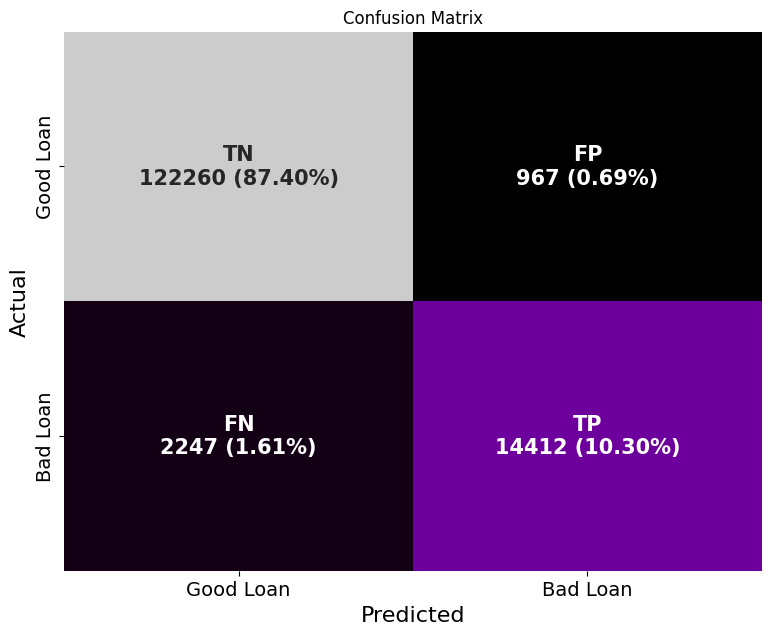

In [108]:
def plot_confusion_matrix(model, X_test, y_test, threshold):
    """
    This function plots the confusion matrix for a given model.
    
    Parameters:
    model: The machine learning model to be evaluated.
    X_test: The testing data.
    y_test: The labels for the testing data.
    threshold: The threshold for classifying the output into different classes.
    
    Returns:
    A plot of the confusion matrix, with the number and percentage of each type of prediction displayed.
    """
    
    # Get the predicted probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the predicted values based on the threshold
    y_pred = (y_pred_proba > threshold).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate the percentage of each value in the confusion matrix
    cm_perc = cm / cm.sum()

    # Define the labels
    labels = np.array([['TN', 'FP'],
                       ['FN', 'TP']])
    
    # Create labels with the percentage values
    labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                              for label, value, percentage in zip(labels.flatten(), cm.flatten(), cm_perc.flatten())])
                 ).reshape(2,2)

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(9, 7))
    sns.heatmap(
        cm, 
        annot=labels, 
        fmt='', 
        cmap='nipy_spectral', 
        cbar=False, 
        annot_kws={'size': 15, 'weight': 'bold'}, 
        # linewidths=0.5, 
        linecolor='black', 
        xticklabels=['Good Loan', 'Bad Loan'], 
        yticklabels=['Good Loan', 'Bad Loan']
    
    )
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix for the Logistic Regression model using the testing data and a threshold of 0.4
plot_confusion_matrix(cat, X_test_scaled, y_test, 0.45)

In [70]:
avg_loan * total_good_loans_before

5873258514.609841

In [60]:
# Define the initial variables
tp = 14412  # true positives
fn = 2247 # false negatives
fp = 1234 # false positives
tn = 122260 # true negatives
total_clients = dfloan.shape[0]
total_clients_test = X_test_scaled.shape[0]
total_bad_loans_before = dfloan.loan_status.value_counts()[1]
total_good_loans_before = dfloan.loan_status.value_counts()[0]
total_loan = dfloan.funded_amnt.sum() # Aggregated good loan + bad loan
avg_loan =  total_loan / dfloan.shape[0] # average loan

# Calculate the default rate before the model
dr_before_model = total_bad_loans_before / total_clients
print(f'Total bad loans before model: {"{:,}".format(total_bad_loans_before)}')
print(f'\nDefault rate before model: {round(dr_before_model * 100, 1)}%')

# Calculate the default rate after the model
dr_after_model = (fp + fn) / total_clients_test
print(f'Default rate after model: {round(dr_after_model * 100, 1)}%')

# Calculate the decrease in default rate
decreased_dr = dr_after_model - dr_before_model
print(f'Decreased default rate: {round(decreased_dr * 100, 1)}%')

# Calculate the total bad loans after the model
total_bad_loans_after = dr_after_model * total_clients
print(f'\nTotal bad loans after model: {"{:,}".format(round(total_bad_loans_after))}')

# Calculate the decrease in bad loans
decreased_bad_loans = total_bad_loans_after - total_bad_loans_before
print(f'Decreased bad loans: {"{:,}".format(round(decreased_bad_loans))}')

# Calculate the total revenue, loss due to default(ldd) and net revenue before the model
tr_before = total_good_loans_before * avg_loan
total_ldd_before = total_bad_loans_before * avg_loan
net_revenue_before = tr_before - total_ldd_before
print(f'\nTotal Revenue before model:', "{:,}".format(round(tr_before)))
print(f'Total Loss due to Defaults amount before model: {"{:,}".format(round(total_ldd_before))}')
print(f'Net revenue before model: {"{:,}".format(round(net_revenue_before))}')

# Calculate the total good clients after the model
total_good_loans_after = total_clients - total_bad_loans_after

# Calculate the total revenue, loss due to default(ldd) and net revenue after the model
tr_after = total_good_loans_after * avg_loan
total_ldd_after = total_bad_loans_after * avg_loan
net_revenue_after = tr_after - total_ldd_after
print(f'\nTotal Revenue after model: {"{:,}".format(round(tr_after))}')
print(f'Total Loss due to Defaults amount after model: {"{:,}".format(round(total_ldd_after))}')
print(f'Net revenue after model: {"{:,}".format(round(net_revenue_after))}')

net_revenue_increase = net_revenue_after - net_revenue_before
print(f'\nNet revenue increase: {"{:,}".format(round(net_revenue_increase))}')

# # Calculate the FPR and lost revenue due to false positives
# fpr = (total_clients_test - tp) / total_good_clients_before
# lost_revenue_fp = fpr * total_good_clients_before * avg_loan

# # Calculate the Cost of Capital on Lost Revenue (assuming 5% cost of capital)
# cost_of_capital = 0.05
# cost_of_capital_on_lost_revenue = lost_revenue_fp * cost_of_capital

# # Calculate Net Revenue Impact (Adjusted for False Positives)
# net_revenue_impact_adjusted = net_revenue_increase - cost_of_capital_on_lost_revenue

# # Print the results
# print(f'\nFalse Positive Rate: {round(fpr * 100, 1)}%')
# print(f'Lost Revenue from False Positives: {"{:,}".format(round(lost_revenue_fp))}')
# print(f'Cost of Capital on Lost Revenue: {"{:,}".format(round(cost_of_capital_on_lost_revenue))}')
# print(f'Net Revenue Impact (Adjusted): {"{:,}".format(round(net_revenue_impact_adjusted))}')

Total bad loans before model: 55,332

Default rate before model: 11.9%
Default rate after model: 2.5%
Decreased default rate: -9.4%

Total bad loans after model: 11,603
Decreased bad loans: -43,729

Total Revenue before model: 5,873,258,515
Total Loss due to Defaults amount before model: 790,793,935
Net revenue before model: 5,082,464,579

Total Revenue after model: 6,498,220,511
Total Loss due to Defaults amount after model: 165,831,939
Net revenue after model: 6,332,388,573

Net revenue increase: 1,249,923,993
